## INDIAN STARTUP EXPLORATION AND ANALYSIS 

### TOPIC: Insight into the Indian Start-Up Ecosystem

#### DESCRIPTION:

#### HYPOTHESIS
H0 – Startups location influence the amount of funding received from investors.

H1 - Startups location do not have an influence on the amount of funding received from investors.

#### ANALYTICAL QUESTIONS
I.                What is the total amount invested over the 4 years period?

II.              Which Stage/ Series has the most investment?

III.            Has the amounts of investments increased or decreased over the period (need to be rephrased to capture Delhi)

IV.            What are the top five (5) industries or sectors with more investment?

V.              What is the highest type of investment that was made?

VI.            Does the stage of a venture affect the amount of funding received?

VII.         Which Top 5 startups are investors favorite?

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
#import seaborn as sns
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


#### IMPORTING DATA SETS 

In [3]:
#importing the 2018 dataset

ind_start_18 = pd.read_csv('./Data/startup_funding2018.csv')
ind_start_19 = pd.read_csv('./Data/startup_funding2019.csv')
ind_start_20 = pd.read_csv('./Data/startup_funding2020.csv')
ind_start_21 = pd.read_csv('./Data/startup_funding2021.csv')

In [4]:
#adding a year column since we will be concatennating 
ind_start_18['Year'] = '2018'

In [5]:
ind_start_18.head()

Company Name                                           Industry  \
0  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
1  Happy Cow Dairy                               Agriculture, Farming   
2       MyLoanCare   Credit, Financial Services, Lending, Marketplace   
3      PayMe India                        Financial Services, FinTech   
4         Eunimart                 E-Commerce Platforms, Retail, SaaS   

  Round/Series       Amount                          Location  \
0         Seed       250000       Bangalore, Karnataka, India   
1         Seed  ₹40,000,000        Mumbai, Maharashtra, India   
2     Series A  ₹65,000,000           Gurgaon, Haryana, India   
3        Angel      2000000       Noida, Uttar Pradesh, India   
4         Seed            —  Hyderabad, Andhra Pradesh, India   

                                       About Company  Year  
0  TheCollegeFever is a hub for fun, fiesta and f...  2018  
1  A startup which aggregates milk from dairy far...  2018  
2          Leading Online Loans Marketplace in India  2018  
3  PayMe India is an innovative FinTech organizat...  2018  
4  Eunimart is a one stop solution for merchants ...  2018

In [6]:
ind_start_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Year           526 non-null    object
dtypes: object(7)
memory usage: 28.9+ KB


In [7]:
ind_start_18.describe()

Company Name Industry Round/Series Amount  \
count               526      526          526    526   
unique              525      405           21    198   
top     TheCollegeFever        —         Seed      —   
freq                  2       30          280    148   

                           Location  \
count                           526   
unique                           50   
top     Bangalore, Karnataka, India   
freq                            102   

                                            About Company  Year  
count                                                 526   526  
unique                                                524     1  
top     TheCollegeFever is a hub for fun, fiesta and f...  2018  
freq                                                    2   526

In [8]:
ind_start_18.isna().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
Year             0
dtype: int64

##### Analysing and cleaning dataset column by column 

things to look out for 

i. duplicated records

ii. column and record anormalies 

iii. Handle missing values 

iv. check datatypes 


In [9]:
ind_start_18.dtypes

Company Name     object
Industry         object
Round/Series     object
Amount           object
Location         object
About Company    object
Year             object
dtype: object

In [10]:
# Analtysing Company Name
# Checking for duplicated values 
ind_start_18['Company Name'].duplicated().value_counts()

False    525
True       1
Name: Company Name, dtype: int64

In [11]:
ind_start_18[ind_start_18["Company Name"].duplicated(keep=False)].sort_values(by="Company Name")

Company Name                                           Industry  \
0    TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
348  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   

    Round/Series  Amount                     Location  \
0           Seed  250000  Bangalore, Karnataka, India   
348         Seed  250000  Bangalore, Karnataka, India   

                                         About Company  Year  
0    TheCollegeFever is a hub for fun, fiesta and f...  2018  
348  TheCollegeFever is a hub for fun, fiesta and f...  2018

In [12]:
# Droping duplicated values 
ind_start_18.drop_duplicates(keep='first' ,inplace = True)
ind_start_18.duplicated().sum()

0

In [13]:
ind_start_18['Company Name'].duplicated().sum()

0

In [14]:
pd.set_option('display.max_columns', None)
ind_start_18['Company Name']


0                                        TheCollegeFever
1                                        Happy Cow Dairy
2                                             MyLoanCare
3                                            PayMe India
4                                               Eunimart
5                                                 Hasura
6                                              Tripshelf
7                                           Hyperdata.IO
8                                           Freightwalla
9                                     Microchip Payments
10                            BizCrum Infotech Pvt. Ltd.
11                                               Emojifi
12                                                 Flock
13                                             Freshboxx
14                            Wide Mobility Mechatronics
15                                               Pitstop
16                                                Mihuru
17                             

In [15]:
ind_start_18['Industry']

0      Brand Marketing, Event Promotion, Marketing, S...
1                                   Agriculture, Farming
2       Credit, Financial Services, Lending, Marketplace
3                            Financial Services, FinTech
4                     E-Commerce Platforms, Retail, SaaS
5                       Cloud Infrastructure, PaaS, SaaS
6                         Internet, Leisure, Marketplace
7                                        Market Research
8           Information Services, Information Technology
9                                        Mobile Payments
10                                            B2B, Shoes
11                                              Internet
12     Apps, Collaboration, Developer Platform, Enter...
13                                         Food Delivery
14                                 Industrial Automation
15           Automotive, Search Engine, Service Industry
16                             Finance, Internet, Travel
17     Accounting, Business Inf

In [16]:
# Fetches the first index of the sectors
ind_start_18["Industry"]= ind_start_18["Industry"].str.split(",").str[0]

# Replaces all _ with np.nan

ind_start_18["Industry"]= ind_start_18.Industry.replace("—", np.nan)
ind_start_18.head()

Company Name              Industry Round/Series       Amount  \
0  TheCollegeFever       Brand Marketing         Seed       250000   
1  Happy Cow Dairy           Agriculture         Seed  ₹40,000,000   
2       MyLoanCare                Credit     Series A  ₹65,000,000   
3      PayMe India    Financial Services        Angel      2000000   
4         Eunimart  E-Commerce Platforms         Seed            —   

                           Location  \
0       Bangalore, Karnataka, India   
1        Mumbai, Maharashtra, India   
2           Gurgaon, Haryana, India   
3       Noida, Uttar Pradesh, India   
4  Hyderabad, Andhra Pradesh, India   

                                       About Company  Year  
0  TheCollegeFever is a hub for fun, fiesta and f...  2018  
1  A startup which aggregates milk from dairy far...  2018  
2          Leading Online Loans Marketplace in India  2018  
3  PayMe India is an innovative FinTech organizat...  2018  
4  Eunimart is a one stop solution for merchants ...  2018

In [17]:
 # Analysing the Industry column 

ind_start_18["Industry"]

0                         Brand Marketing
1                             Agriculture
2                                  Credit
3                      Financial Services
4                    E-Commerce Platforms
5                    Cloud Infrastructure
6                                Internet
7                         Market Research
8                    Information Services
9                         Mobile Payments
10                                    B2B
11                               Internet
12                                   Apps
13                          Food Delivery
14                  Industrial Automation
15                             Automotive
16                                Finance
17                             Accounting
18                Artificial Intelligence
19                     Internet of Things
20                     Air Transportation
21                     Financial Services
22                      Food and Beverage
23                    Autonomous V

looks fine 

In [18]:
# Analysing the 'Round/Series' column 
ind_start_18['Round/Series'].unique()


array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

there are two unknown values that we need to take care of

i.  undisclosed 

ii. https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593 

In [19]:
# replacing with their actual values 
ind_start_18[ind_start_18['Round/Series']=='https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593']


Company Name Industry  \
178  BuyForexOnline   Travel   

                                          Round/Series   Amount  \
178  https://docs.google.com/spreadsheets/d/1x9ziNe...  2000000   

                        Location  \
178  Bangalore, Karnataka, India   

                                         About Company  Year  
178  BuyForexOnline.com is India's first completely...  2018

In [20]:
ind_start_18.loc[178, 'Round/Series']='Seed'

In [21]:
ind_start_18[ind_start_18['Round/Series']=='Undisclosed']


Company Name   Industry Round/Series      Amount  \
164       Classworks India  Education  Undisclosed    ₹100,000   
406  Traveo Soft Pvt. Ltd.     Mobile  Undisclosed  ₹1,200,000   

                        Location  \
164   Chennai, Tamil Nadu, India   
406  Bangalore, Karnataka, India   

                                     About Company  Year  
164    Saas, Web App, Mobile App, School Education  2018  
406  AI based Business Travel & Expense management  2018

In [22]:
# replacing the Undisclosed with NaN
ind_start_18.loc[164, 'Round/Series']=np.nan
ind_start_18.loc[164, 'Round/Series']=np.nan

In [23]:
ind_start_18['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

We realised some anormalies in the amount data set
1. Some values are in rupees 
2. Some values are also in dollars 
3. some records have '-'  

In [24]:
# Remove "," from dataset
ind_start_18["Amount"]= ind_start_18.Amount.apply(lambda x:str(x).replace(",", ""))

# Filter out values containting "₹"
rupee_rec = ind_start_18['Amount'].str.contains('₹')

In [25]:
# creating a rupee dataframe 
df_rupee = ind_start_18[rupee_rec].copy()
df_rupee['Amount'] = df_rupee['Amount'].str.replace('₹', '')
df_rupee['Amount'] = df_rupee['Amount'].astype(float)

In [26]:
# converting to dollars with 2018 exchange rate 
dollar_exchange_rate_2018 = 68.4113

df_rupee['Amount'] = round(df_rupee['Amount'] /dollar_exchange_rate_2018 , 0)

In [27]:
# converting back to string 
df_rupee['Amount'] = df_rupee['Amount'].astype(str)

In [28]:
# replacing the converted rates
ind_start_18.loc[rupee_rec, 'Amount'] = df_rupee['Amount'].values

In [29]:
# Removing $ symbol from the column 
ind_start_18['Amount'] = ind_start_18['Amount'].str.replace('$', '')

# replacing all '-' with NaN
ind_start_18["Amount"]=ind_start_18["Amount"].replace("—", np.nan)

C:\Users\Domino\AppData\Local\Temp\ipykernel_11032\3094005919.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ind_start_18['Amount'] = ind_start_18['Amount'].str.replace('$', '')


In [30]:
# Converting Column to Numeric and changing data type to int
ind_start_18['Amount'] = pd.to_numeric(ind_start_18['Amount'])
ind_start_18['Amount'] = ind_start_18['Amount'].replace(np.nan, 0)
ind_start_18['Amount'] = ind_start_18['Amount'].astype(int)
ind_start_18['Amount']

0          250000
1          584699
2          950135
3         2000000
4               0
5         1600000
6          233879
7          730873
8               0
9               0
10              0
11              0
12              0
13              0
14              0
15        1461747
16         150000
17        1100000
18              0
19           7309
20        6000000
21         650000
22         511611
23         935518
24              0
25              0
26        2000000
27        2000000
28        2000000
29              0
30         292349
31        1000000
32              0
33         650000
34        1000000
35        5000000
36        4000000
37         438524
38        1000000
39        2800000
40              0
41         150000
42         584699
43        1000000
44        1700000
45              0
46        1300000
47        2000000
48              0
49          73087
50         292349
51         584699
52         292349
53        1000000
54         182718
55        

In [31]:
# Analysing Location Column 
ind_start_18['Location'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [32]:
# since the records comes with their cities state and country we will strip on the cities out, since that is what we are interested in 
ind_start_18['Location'] = ind_start_18['Location'].str.split(',').str[0]

ind_start_18['Location'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

In [33]:
# Analysing About Company column
ind_start_18['About Company']

0      TheCollegeFever is a hub for fun, fiesta and f...
1      A startup which aggregates milk from dairy far...
2              Leading Online Loans Marketplace in India
3      PayMe India is an innovative FinTech organizat...
4      Eunimart is a one stop solution for merchants ...
5      Hasura is a platform that allows developers to...
6      Tripshelf is an online market place for holida...
7      Hyperdata combines advanced machine learning w...
8      Freightwalla is an international forwarder tha...
9      Microchip payments is a mobile-based payment a...
10              Building Transactionary B2B Marketplaces
11     Emojifi is an app that provides live emoji, st...
12     Flock is a real-time messaging and collaborati...
13     Freshboxx is incubated at Sandbox Startups, a ...
14     Wide Mobility Mechatronics is a Private Compan...
15     Pitstop offers general repair and maintenance ...
16     Mihuru is an online platform which gives micro...
17     Fyle is an intelligent e

looks good 

In [34]:
ind_start_18.head(10)

Company Name              Industry Round/Series   Amount   Location  \
0     TheCollegeFever       Brand Marketing         Seed   250000  Bangalore   
1     Happy Cow Dairy           Agriculture         Seed   584699     Mumbai   
2          MyLoanCare                Credit     Series A   950135    Gurgaon   
3         PayMe India    Financial Services        Angel  2000000      Noida   
4            Eunimart  E-Commerce Platforms         Seed        0  Hyderabad   
5              Hasura  Cloud Infrastructure         Seed  1600000  Bengaluru   
6           Tripshelf              Internet         Seed   233879    Kalkaji   
7        Hyperdata.IO       Market Research        Angel   730873  Hyderabad   
8        Freightwalla  Information Services         Seed        0     Mumbai   
9  Microchip Payments       Mobile Payments         Seed        0  Bangalore   

                                       About Company  Year  
0  TheCollegeFever is a hub for fun, fiesta and f...  2018  
1  A startup which aggregates milk from dairy far...  2018  
2          Leading Online Loans Marketplace in India  2018  
3  PayMe India is an innovative FinTech organizat...  2018  
4  Eunimart is a one stop solution for merchants ...  2018  
5  Hasura is a platform that allows developers to...  2018  
6  Tripshelf is an online market place for holida...  2018  
7  Hyperdata combines advanced machine learning w...  2018  
8  Freightwalla is an international forwarder tha...  2018  
9  Microchip payments is a mobile-based payment a...  2018

In [35]:
ind_start_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   525 non-null    object
 1   Industry       495 non-null    object
 2   Round/Series   524 non-null    object
 3   Amount         525 non-null    int32 
 4   Location       525 non-null    object
 5   About Company  525 non-null    object
 6   Year           525 non-null    object
dtypes: int32(1), object(6)
memory usage: 46.9+ KB


the 2018 dataset seem to be missing some rows 
1. founders
2. Founded
3. Investor 

#### Analysing and cleaning of 2019 dataset

In [36]:
# previewing the first 5 rows of the data 
ind_start_19.head()

Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving      NaN         NaN        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun      NaN      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                            Investor     Amount($)  \
0                               Sixth Sense Ventures    $6,300,000   
1                                   General Atlantic  $150,000,000   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey   $28,000,000   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...   $30,000,000   
4           Innovation in Food and Agriculture (IFA)    $6,000,000   

           Stage  
0            NaN  
1       Series C  
2  Fresh funding  
3       Series D  
4            NaN

In [37]:
# checkingthe column names 
ind_start_19.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [38]:
ind_start_19.shape

(89, 9)

In [39]:
# check a brief info on the dataset
ind_start_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [40]:
# checking out some stats from the dataset
ind_start_19.describe()

Founded
count    60.000000
mean   2014.533333
std       2.937003
min    2004.000000
25%    2013.000000
50%    2015.000000
75%    2016.250000
max    2019.000000

In [41]:
# checking for duplicate 
ind_start_19.duplicated().value_counts()

False    89
dtype: int64

#### according to the duplicate count looks like there isnt any duplicate but we would like to check this manually and compare 

In [42]:
ind_start_19.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [43]:
ind_start_19[ind_start_19["Company/Brand"].duplicated(keep=False)].sort_values(by="Company/Brand")

Company/Brand  Founded    HeadQuarter      Sector  \
7       Kratikal   2013.0          Noida  Technology   
82      Kratikal      NaN  Uttar pradesh  Technology   
30       Licious      NaN      Bangalore        Food   
68       Licious   2015.0      Bangalore        Food   

                                         What it does  \
7   It is a product-based cybersecurity solutions ...   
82                  Provides cyber security solutions   
30                                   Online meat shop   
68                                   Online meat shop   

                                           Founders  \
7   Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa   
82                                   Pavan Kushwaha   
30                       Vivek Gupta, Abhay Hanjura   
68                       Vivek Gupta, Abhay Hanjura   

                                      Investor    Amount($)         Stage  
7   Gilda VC, Art Venture, Rajeev Chitrabhanu.   $1,000,000  Pre series A  
82   Gilda VC, Art Venture, Rajeev Chitrabhanu   $1,000,000  Pre-series A  
30                          Vertex Growth Fund  $30,000,000      Series E  
68                             Vertex Ventures  $25,000,000      Series D

In [44]:
# two records seem to have repeated so after analysing we willhave to drop line 82, since line 7 and line 82 are the same records 
ind_start_19.drop(82, axis = 0, inplace=True)

#### Analysing Columnwise

In [45]:
# Analysing the Company/Brand Column 
ind_start_19['Company/Brand']

0                   Bombay Shaving
1                        Ruangguru
2                         Eduisfun
3                         HomeLane
4                         Nu Genes
5                         FlytBase
6                            Finly
7                         Kratikal
8                        Quantiphi
9                         Lenskart
10                      Cub McPaws
11                        Appnomic
12                      Kaleidofin
13                       JobSquare
14                     Open Secret
15                          LivFin
16                          Byju's
17                      Zest Money
18                         Witblox
19    Azah Personal Care Pvt. Ltd.
20                      SalaryFits
21                    Pristyn Care
22                     Springboard
23              DROR Labs Pvt. Ltd
24                         Medlife
25                         Seekify
26                Toffee Insurance
27                   Fireflies .ai
28                  

looks good 

In [46]:
# Analysing founded 
ind_start_19['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

In [47]:
# replacing nan with a numeric value and convert to int
ind_start_19['Founded'] = ind_start_19['Founded'].replace(np.nan, 0)
ind_start_19['Founded'] = ind_start_19['Founded'].astype(int)

looks good now

In [48]:
ind_start_19['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Hyderabad', 'Rajasthan'],
      dtype=object)

looks good except for some missing values that would be handled later 

In [49]:
ind_start_19['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

has no anormalies, looks good 

In [50]:
ind_start_19['What it does']

0            Provides a range of male grooming products
1     A learning platform that provides topic-based ...
2               It aims to make learning fun via games.
3                 Provides interior designing solutions
4     It is a seed company engaged in production, pr...
5                           A drone automation platform
6     It builds software products that makes work si...
7     It is a product-based cybersecurity solutions ...
8     It is an AI and big data services company prov...
9                               It is a eyewear company
10    A B2C  brand that focusses on premium and comf...
11    It is a self-healing enterprise, the IT operat...
12    Platform that provides complete financial solu...
13    Technology-based platform that is connecting s...
14             It produces and sells top quality snacks
15    Grants small business loans, supply chain fina...
16                     Provides online learning classes
17    Uses AI to do risk profiling of e-commerce

looks great 

In [51]:
ind_start_19['Founders'].unique()

array(['Shantanu Deshpande', 'Adamas Belva Syah Devara, Iman Usman.',
       'Jatin Solanki', 'Srikanth Iyer, Rama Harinath',
       'Narayana Reddy Punyala', 'Nitin Gupta',
       'Vivek AG, Veekshith C Rai',
       'Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa',
       'Renuka Ramnath', 'Peyush Bansal, Amit Chaudhary, Sumeet Kapahi',
       'Abhay Bhat, Kinnar Shah', 'D Padmanabhan',
       'Puneet Gupta, Sucharita Mukherjee', 'Ishit Jethwa',
       'Ahana Gautam, Udit Kejriwal', 'Rakesh Malhotra',
       'Byju Raveendran', 'Chapman, Priya Sharma, Ashish Anantharaman',
       'Amit Modi', 'Mohammed, Shashwat Diesh', 'Renato Araujo',
       'Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garima Sawhney',
       'Gautam Tambay, Parul Gupta', 'Dhiraj Naubhar, Dheeraj Bansal',
       'Tushar Kumar, Prashant Singh', 'Arihant Jain, Ajeet Kushwaha',
       'Nishant Jain, Rohan Kumar', 'Sam Udotong',
       'Sandipan Mitra, Uttam Kumar',
       'Nukul Upadhye, Mahesh Jakhotia, Jitender Bedwal, 

In [52]:
# one of the values has a team name so we woul like to visualise that record 
ind_start_19[ind_start_19['Founders'] == 'Team of Waterloo-based software developers' ]

Company/Brand  Founded HeadQuarter         Sector  \
70          Zebu     2015         NaN  Cybersecurity   

                                         What it does  \
70  Platform uses encryption technology to allow b...   

                                      Founders     Investor   Amount($)  \
70  Team of Waterloo-based software developers  Undisclosed  $4,000,000   

         Stage  
70  Seed round

In [53]:
# looks like we can used that column recor to fill the location data 
ind_start_19.loc[70, 'HeadQuarter'] = 'Waterloo' 

In [54]:
# Analysing Investor Column 
ind_start_19['Investor'].unique()

array(['Sixth Sense Ventures', 'General Atlantic',
       'Deepak Parekh, Amitabh Bachchan, Piyush Pandey',
       'Evolvence India Fund (EIF), Pidilite Group, FJ Labs',
       'Innovation in Food and Agriculture (IFA)', 'Undisclosed',
       'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,\xa0\xa091springboard via Atal Innovation Mission, Niti Aayog.',
       'Gilda VC, Art Venture, Rajeev Chitrabhanu.',
       'Multiples Alternate Asset Management', 'SoftBank',
       'Venture Catalysts', 'Avataar Ventures', 'Oikocredit',
       'Titan Capital', 'Matrix Partners',
       'German development finance institution DEG',
       'South Africa’s Naspers Ventures, the CPP Investment Board',
       'Goldman Sachs.', 'Mumbai Angels Network',
       'Kunal Bahl, Rohit Bansal.', 'Brazilian VC Fund Confrapar',
       'Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.',
       'Reach Capital', 'Inflection Point Ventures',
       'Wilson Global Opportunities Fund

looks good

In [55]:
# Analysing the unique values in that column 
ind_start_19['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [56]:
ind_start_19['Amount($)'] = ind_start_19['Amount($)'].replace('Undisclosed', np.nan)

In [57]:
#Setting the datatype of the Amount Column to string
ind_start_19["Amount($)"] = ind_start_19["Amount($)"].apply(str)

#Replacing the comma separator with an empty string
ind_start_19["Amount($)"].replace(",","", inplace = True, regex=True)
ind_start_19[:10]

Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving        0         NaN        Ecommerce   
1       Ruangguru     2014      Mumbai           Edtech   
2        Eduisfun        0      Mumbai           Edtech   
3        HomeLane     2014     Chennai  Interior design   
4        Nu Genes     2004   Telangana         AgriTech   
5        FlytBase        0        Pune       Technology   
6           Finly        0   Bangalore             SaaS   
7        Kratikal     2013       Noida       Technology   
8       Quantiphi        0         NaN        AI & Tech   
9        Lenskart     2010       Delhi       E-commerce   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   
5                        A drone automation platform   
6  It builds software products that makes work si...   
7  It is a product-based cybersecurity solutions ...   
8  It is an AI and big data services company prov...   
9                            It is a eyewear company   

                                          Founders  \
0                               Shantanu Deshpande   
1            Adamas Belva Syah Devara, Iman Usman.   
2                                    Jatin Solanki   
3                     Srikanth Iyer, Rama Harinath   
4                           Narayana Reddy Punyala   
5                                      Nitin Gupta   
6                        Vivek AG, Veekshith C Rai   
7  Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa   
8                                   Renuka Ramnath   
9     Peyush Bansal, Amit Chaudhary, Sumeet Kapahi   

                                            Investor   Amount($)  \
0                               Sixth Sense Ventures    $6300000   
1                                   General Atlantic  $150000000   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey   $28000000   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...   $30000000   
4           Innovation in Food and Agriculture (IFA)    $6000000   
5                                        Undisclosed         nan   
6  Social Capital, AngelList India, Gemba Capital...         nan   
7         Gilda VC, Art Venture, Rajeev Chitrabhanu.    $1000000   
8               Multiples Alternate Asset Management   $20000000   
9                                           SoftBank  $275000000   

           Stage  
0            NaN  
1       Series C  
2  Fresh funding  
3       Series D  
4            NaN  
5            NaN  
6            NaN  
7   Pre series A  
8       Series A  
9       Series G

In [58]:

ind_start_19['Amount($)'] = ind_start_19['Amount($)'].str.replace('$', '')
ind_start_19['Amount($)']

C:\Users\Domino\AppData\Local\Temp\ipykernel_11032\1713165696.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ind_start_19['Amount($)'] = ind_start_19['Amount($)'].str.replace('$', '')


0       6300000
1     150000000
2      28000000
3      30000000
4       6000000
5           nan
6           nan
7       1000000
8      20000000
9     275000000
10          nan
11     22000000
12      5000000
13       140500
14          nan
15      5000000
16    540000000
17     15000000
18       182700
19          nan
20      5000000
21     12000000
22     11000000
23          nan
24     15500000
25      1500000
26      5500000
27      5000000
28     12000000
29      2500000
30     30000000
31       140000
32          nan
33    230000000
34     20000000
35     49400000
36     32000000
37     26000000
38       150000
39       400000
40      2000000
41    100000000
42      8000000
43      1500000
44       100000
45          nan
46     50000000
47      6000000
48    120000000
49      4000000
50     30000000
51      4000000
52      1500000
53      1000000
54          nan
55          nan
56     26000000
57      5500000
58      6800000
59      6000000
60     36000000
61      5700000
62     5

In [59]:
# Analysing Stage Column 
ind_start_19['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round'], dtype=object)

In [60]:
ind_start_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  88 non-null     object
 1   Founded        88 non-null     int32 
 2   HeadQuarter    70 non-null     object
 3   Sector         83 non-null     object
 4   What it does   88 non-null     object
 5   Founders       85 non-null     object
 6   Investor       88 non-null     object
 7   Amount($)      88 non-null     object
 8   Stage          42 non-null     object
dtypes: int32(1), object(8)
memory usage: 8.6+ KB


In [61]:
# converting the Amount$ to int
ind_start_19["Amount($)"]= ind_start_19["Amount($)"].apply(lambda x:str(x).replace("nan", "0"))
ind_start_19['Amount($)'] = ind_start_19['Amount($)'].astype(int)
ind_start_19['Amount($)']

0       6300000
1     150000000
2      28000000
3      30000000
4       6000000
5             0
6             0
7       1000000
8      20000000
9     275000000
10            0
11     22000000
12      5000000
13       140500
14            0
15      5000000
16    540000000
17     15000000
18       182700
19            0
20      5000000
21     12000000
22     11000000
23            0
24     15500000
25      1500000
26      5500000
27      5000000
28     12000000
29      2500000
30     30000000
31       140000
32            0
33    230000000
34     20000000
35     49400000
36     32000000
37     26000000
38       150000
39       400000
40      2000000
41    100000000
42      8000000
43      1500000
44       100000
45            0
46     50000000
47      6000000
48    120000000
49      4000000
50     30000000
51      4000000
52      1500000
53      1000000
54            0
55            0
56     26000000
57      5500000
58      6800000
59      6000000
60     36000000
61      5700000
62     5

In [62]:
ind_start_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  88 non-null     object
 1   Founded        88 non-null     int32 
 2   HeadQuarter    70 non-null     object
 3   Sector         83 non-null     object
 4   What it does   88 non-null     object
 5   Founders       85 non-null     object
 6   Investor       88 non-null     object
 7   Amount($)      88 non-null     int32 
 8   Stage          42 non-null     object
dtypes: int32(2), object(7)
memory usage: 8.2+ KB


### Analysing 2020 Dataset

In [63]:
ind_start_20.head()

Company/Brand Founded HeadQuarter              Sector  \
0    Aqgromalin    2019     Chennai            AgriTech   
1      Krayonnz    2019   Bangalore              EdTech   
2  PadCare Labs    2018        Pune  Hygiene management   
3         NCOME    2020   New Delhi              Escrow   
4    Gramophone    2016      Indore            AgriTech   

                                        What it does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   
2   Converting bio-hazardous waste to harmless waste   
3                       Escrow-as-a-service platform   
4  Gramophone is an AgTech platform enabling acce...   

                                            Founders  \
0                    Prasanna Manogaran, Bharani C L   
1                   Saurabh Dixit, Gurudutt Upadhyay   
2                                    Ajinkya Dhariya   
3                                      Ritesh Tiwari   
4  Ashish Rajan Singh, Harshit Gupta, Nishant Mah...   

                              Investor    Amount($)     Stage Unnamed: 9  
0                      Angel investors     $200,000       NaN        NaN  
1                      GSF Accelerator     $100,000  Pre-seed        NaN  
2                       Venture Center  Undisclosed  Pre-seed        NaN  
3  Venture Catalysts, PointOne Capital     $400,000       NaN        NaN  
4  Siana Capital Management, Info Edge     $340,000       NaN        NaN

In [64]:
ind_start_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [65]:
ind_start_20.describe()

Company/Brand Founded HeadQuarter   Sector  \
count           1055     843         961     1042   
unique           905      27          77      302   
top            Nykaa    2015   Bangalore  Fintech   
freq               6     136         317       80   

                            What it does       Founders           Investor  \
count                               1055           1043               1017   
unique                               990            927                848   
top     Provides online learning classes  Falguni Nayar  Venture Catalysts   
freq                                   4              6                 20   

          Amount($)     Stage Unnamed: 9  
count          1052       591          2  
unique          309        42          2  
top     Undisclosed  Series A   Pre-Seed  
freq            243        96          1

In [66]:
# checking for duplicates 
ind_start_20.columns


Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'Unnamed: 9'],
      dtype='object')

In [67]:
ind_start_20['Company/Brand']

0                                  Aqgromalin
1                                    Krayonnz
2                                PadCare Labs
3                                       NCOME
4                                  Gramophone
5                                      qZense
6                                MyClassboard
7                                       Metvy
8                                      Rupeek
9                                   Gig India
10                                Slurrp Farm
11                                     Medfin
12                                    MasterG
13                                   Brila 91
14                                 FoodyBuddy
15                                     Zomato
16                                  OurEye.ai
17                                 Shiprocket
18                                  Pine Labs
19                          Moneyboxx Finance
20                                       EWar
21                         SucSEED

looks fine 

In [68]:
ind_start_20['Founded']

0       2019
1       2019
2       2018
3       2020
4       2016
5       2019
6       2008
7       2018
8       2015
9       2017
10      2016
11      2017
12      2015
13      2014
14      2015
15      2008
16      2020
17      2017
18      1998
19      2019
20      2019
21      2016
22      2019
23      2016
24      2018
25      2017
26      2016
27      2007
28      2020
29      2011
30      1982
31      2015
32      2015
33      2018
34      2016
35      2016
36      2013
37      2019
38      2016
39      2008
40      2016
41      2017
42      2011
43      2019
44      2020
45      2017
46      2015
47      2020
48      2015
49      2016
50      2015
51      2017
52      2020
53      2016
54      2019
55      2019
56      2009
57      2020
58      2014
59      2014
60      2015
61      2014
62      2019
63      2017
64      2016
65      2019
66      2019
67      2017
68      2015
69      2020
70      2012
71      2018
72      2015
73      2011
74      2018
75      2014
76      2020

In [69]:
ind_start_20['Founded'] = ind_start_20['Founded'].replace(np.nan, 0)
ind_start_20['Founded']

0       2019
1       2019
2       2018
3       2020
4       2016
5       2019
6       2008
7       2018
8       2015
9       2017
10      2016
11      2017
12      2015
13      2014
14      2015
15      2008
16      2020
17      2017
18      1998
19      2019
20      2019
21      2016
22      2019
23      2016
24      2018
25      2017
26      2016
27      2007
28      2020
29      2011
30      1982
31      2015
32      2015
33      2018
34      2016
35      2016
36      2013
37      2019
38      2016
39      2008
40      2016
41      2017
42      2011
43      2019
44      2020
45      2017
46      2015
47      2020
48      2015
49      2016
50      2015
51      2017
52      2020
53      2016
54      2019
55      2019
56      2009
57      2020
58      2014
59      2014
60      2015
61      2014
62      2019
63      2017
64      2016
65      2019
66      2019
67      2017
68      2015
69      2020
70      2012
71      2018
72      2015
73      2011
74      2018
75      2014
76      2020

In [70]:
ind_start_20['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', nan,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',
 

In [71]:
ind_start_20['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', nan,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',
 

In [72]:
ind_start_20['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [73]:
ind_start_20['What it does'].unique()

array(['Cultivating Ideas for Profit',
       'An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.',
       'Converting bio-hazardous waste to harmless waste',
       'Escrow-as-a-service platform',
       'Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.',
       'qZense Labs is building the next-generation IoT solution for fresh food quality assessment and management.',
       'MyClassboard is a full-fledged School / College Management Software.',
       'AI driven networking platform for individuals and organisations which aims to provided a seamless end to end networking experience.',
       'Rupeek is an online lending platform that specializes in credit risk, gold loans, and personal loans.',
       'GigIndia is a marketplace that provides on-demand work completion for companies through a gig workforce of jobseekers.',
       'Slurrp Farm is a children health food brand.',
  

In [74]:
ind_start_20['Founders'].unique()

array(['Prasanna Manogaran, Bharani C L',
       'Saurabh Dixit, Gurudutt Upadhyay', 'Ajinkya Dhariya',
       'Ritesh Tiwari',
       'Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan',
       'Rubal Chib, Dr Srishti Batra', 'Ajay Sakhamuri',
       'Shawrya Mehrotra', 'Amar Prabhu, Ashwin Soni, Sumit Maniyar',
       'Aditya Shirole, Sahil Sharma', 'Meghana Narayan',
       'Arjun Kumar, Arun Kumar, Sidharth Gurjar', 'Gayatri Jolly',
       'Ankur Jain', 'Akil Sethuraman, Anup Gopinath, Rachna Rao',
       'Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah',
       'Miran Junaidi, Saurabh Ghanekar, Sourav Sanyal',
       'Gautam Kapoor, Saahil Goel, Vishesh Khurana', 'Amrish Rau',
       'Prashant Agarwal', 'Parth Chadha, Rahul Singh',
       'Vikrant Varshney', 'Sujit Bangar',
       'Annanya Sarthak, Gurpreet Singh, Praveen Sah', 'Karanpal Singh',
       'Neeraj Khandelwal, Sumit Gupta', 'Naveen Tewari',
       'Virendra Gupta', 'Priyam Saraswat',
       'Kapil Bharati,

In [75]:
ind_start_20['Investor'].unique()

array(['Angel investors', 'GSF Accelerator', 'Venture Center',
       'Venture Catalysts, PointOne Capital',
       'Siana Capital Management, Info Edge',
       'Venture Catalysts, 9Unicorns Accelerator Fund', 'ICICI Bank.',
       'HostelFund', 'KB Investment, Bertelsmann India Investments',
       'Shantanu Deshpande, Subramaniam Ramadorai', 'Fireside Ventures',
       'Axilor Ventures, S.D. Shibulal', "Acumen Fund's angel programme",
       'Sequoia Capital India, Sixth Sense Ventures', 'Rebel Foods',
       'Kora, Tiger Global Management', '100X VC, Amara Ventures',
       'Bertelsmann India Investments, InnoVen Capital',
       'Mastercard, Temasek Holdings', 'BlackSoil, Caspian',
       'Jindal Steels, Jeet Banerjee', nan, 'Zenith Global',
       'Unitus Ventures, Work10M', 'Coinbase Ventures, Polychain',
       'Mithril Capital Management.', 'Google', 'Better Capital',
       'Steadview Capital, Canada Pension Plan Investment Board',
       'Quona Capital', 'Swastika', 'Flipkar

In [76]:
# Realised there was an issue with one of the values in the column 
ind_start_20[ind_start_20["Investor"]== ">Vikram Sud"]

Company/Brand Founded HeadQuarter   Sector  \
192    FlexiLoans    2016      Mumbai  FinTech   

                                          What it does  \
192  an online lending platform started with an end...   

                                              Founders     Investor  \
192  Abhishek Kothari, Deepak Jain, Manish Lunia, R...  >Vikram Sud   

      Amount($) Stage Unnamed: 9  
192  $6,000,000  Debt        NaN

In [77]:
# replacing with the right value 
ind_start_20.loc[192, "Investor"] == "Vikram Sud"

False

In [78]:
# Analysing the Amount($) column 
ind_start_20['Amount($)'].unique()

array(['$200,000', '$100,000', 'Undisclosed', '$400,000', '$340,000',
       '$600,000', '$45,000,000', '$1,000,000', '$2,000,000',
       '$1,200,000', '$660,000,000', '$120,000', '$7,500,000',
       '$5,000,000', '$500,000', '$3,000,000', '$10,000,000',
       '$145,000,000', '$100,000,000', nan, '$21,000,000', '$4,000,000',
       '$20,000,000', '$560,000', '$275,000', '$4,500,000', '$15,000,000',
       '$390,000,000', '$7,000,000', '$5,100,000', '$700,000,000',
       '$2,300,000', '$700,000', '$19,000,000', '$9,000,000',
       '$40,000,000', '$750,000', '$1,500,000', '$7,800,000',
       '$50,000,000', '$80,000,000', '$30,000,000', '$1,700,000',
       '$2,500,000', '$40,000', '$33,000,000', '$35,000,000', '$300,000',
       '$25,000,000', '$3,500,000', '$200,000,000', '$6,000,000',
       '$1,300,000', '$4,100,000', '$575,000', '$800,000', '$28,000,000',
       '$18,000,000', '$3,200,000', '$900,000', '$250,000', '$4,700,000',
       '$75,000,000', '$8,000,000', '$121,000,000'

#### Realised some anormalies with the amount values of the 
1. some of the values do not have the dollar sign symbols before them 
2. text values; Undislosed, Undiclsosed, Undisclosed
3. wrong numeric formats; 42.23,000; $800,000,000 to $850,000,000; $1,90,67,328; 9.600,000; $887,000, $23,000,000

In [79]:
#replacing text values with nan
ind_start_20['Amount($)'].replace('Undisclosed', np.nan, inplace = True )
ind_start_20['Amount($)'].replace('Undiclosed', np.nan, inplace = True )
ind_start_20['Amount($)'].replace('Undislosed', np.nan, inplace = True )

For the other values we would use crunchbase.com to rectify their actual Amounts raised 

In [80]:
# finding record on "$800,000,000 to $850,000,000"
ind_start_20[ind_start_20["Amount($)"]== "$800,000,000 to $850,000,000"]

Company/Brand Founded HeadQuarter     Sector  \
472      Eruditus    2010      Mumbai  Education   

                                          What it does  \
472  Bring world-class business and professional ed...   

                                 Founders  \
472  Chaitanya Kalipatnapu, Ashwin Damera   

                                              Investor  \
472  Bertelsmann India Investments, Sequoia Capital...   

                        Amount($) Stage Unnamed: 9  
472  $800,000,000 to $850,000,000   NaN        NaN

In [81]:
# knowing the company name, we will they run a search from crunchbase.com to find the actual value
# according to crunchbase.com, Eruditus Exec. Education raised $113,000,000 at a Stage of late Stage Venture
# Ref: https://www.crunchbase.com/funding_round/eruditus-executive-education-series-d--8d8695c8

ind_start_20["Amount($)"]= ind_start_20["Amount($)"].apply(lambda x:str(x).replace("$800,000,000 to $850,000,000", "$113,000,000"))


In [82]:
# finding record on "42.23,000"
ind_start_20[ind_start_20["Amount($)"]== "42.23,000"]

Company/Brand Founded HeadQuarter Sector  \
834    Peel Works    2010      Mumbai   SaaS   

                             What it does                            Founders  \
834  E-commerce for corner/retail stores.  Sachin Chhabra, Nidhi Ramachandran   

          Investor  Amount($)        Stage Unnamed: 9  
834  CESC Ventures  42.23,000  Series C, D        NaN

In [83]:
# knowing the company name, we will they run a search from crunchbase.com to find the actual value
# according to crunchbase.com, Peel-Works raised $2,800,000 in 2020 for series D
# Ref: https://www.crunchbase.com/funding_round/peel-works-series-d--43214f46

ind_start_20["Amount($)"]= ind_start_20["Amount($)"].apply(lambda x:str(x).replace("42.23,000", "$2,800,000"))


In [84]:
# finding record on "$1,90,67,328"
ind_start_20[ind_start_20["Amount($)"]== "$1,90,67,328"]

Company/Brand Founded HeadQuarter       Sector  \
345        Strata    2019   Bangalore  Real Estate   

                                          What it does  \
345  Commercial Real Estate, Commercial Property In...   

                    Founders                  Investor     Amount($) Stage  \
345  Lodha, Priyanka Rathore  Propstack, SAIF Partners  $1,90,67,328   NaN   

    Unnamed: 9  
345        NaN

In [85]:
# knowing the company name, we will they run a search from crunchbase.com to find the actual value
# according to crunchbase.com, Strata raised $1,500,000 at a funding stage of Seed
# Ref: https://www.crunchbase.com/funding_round/strata-f0fe-seed--aef1ec26

ind_start_20["Amount($)"]= ind_start_20["Amount($)"].apply(lambda x:str(x).replace("$1,90,67,328", "$1,500,000"))
ind_start_20["Stage"]= ind_start_20["Stage"].replace(np.nan, "Seed")


In [86]:
# finding record on "9.600,000"
ind_start_20[ind_start_20["Amount($)"]== "9.600,000"]

Company/Brand Founded HeadQuarter   Sector  \
552  SATYA Microcapital    1995       Delhi  Fintech   

                                          What it does      Founders  \
552  Microfinance company that offers collateral-fr...  Vivek Tiwari   

                        Investor  Amount($) Stage Unnamed: 9  
552  BlueOrchard Finance Limited  9.600,000  Seed        NaN

In [87]:
# knowing the company name, we will they run a search from crunchbase.com to find the actual value
# according to crunchbase.com, SATYA Microcapital raised 1.1B rupees been $16,079,215
# Ref: https://www.crunchbase.com/funding_round/satya-microcapital-corporate-round--4ad62e26

ind_start_20["Amount($)"]= ind_start_20["Amount($)"].apply(lambda x:str(x).replace("9.600,000", "$16,079,215"))


In [88]:
# finding record on "$887,000, $23,000,000"
ind_start_20[ind_start_20["Amount($)"]== "$887,000, $23,000,000"]

Company/Brand Founded HeadQuarter   Sector  \
465  True Balance    2014    Gurugram  Finance   

                                          What it does              Founders  \
465  Earn money by meeting financial needs of your ...  Charlie, Jay, Martin   

        Investor              Amount($)     Stage Unnamed: 9  
465  Balancehero  $887,000, $23,000,000  Series C        NaN

In [89]:
# knowing the company name, we will they run a search from crunchbase.com to find the actual value
# according to crunchbase.com, True Balance raised $28,000,000
# Ref: https://www.crunchbase.com/funding_round/true-balance-series-d--ed7363be

ind_start_20["Amount($)"]= ind_start_20["Amount($)"].apply(lambda x:str(x).replace("$887,000, $23,000,000", "$28,000,000"))


In [90]:
ind_start_20['Amount($)'].unique()

array(['$200,000', '$100,000', 'nan', '$400,000', '$340,000', '$600,000',
       '$45,000,000', '$1,000,000', '$2,000,000', '$1,200,000',
       '$660,000,000', '$120,000', '$7,500,000', '$5,000,000', '$500,000',
       '$3,000,000', '$10,000,000', '$145,000,000', '$100,000,000',
       '$21,000,000', '$4,000,000', '$20,000,000', '$560,000', '$275,000',
       '$4,500,000', '$15,000,000', '$390,000,000', '$7,000,000',
       '$5,100,000', '$700,000,000', '$2,300,000', '$700,000',
       '$19,000,000', '$9,000,000', '$40,000,000', '$750,000',
       '$1,500,000', '$7,800,000', '$50,000,000', '$80,000,000',
       '$30,000,000', '$1,700,000', '$2,500,000', '$40,000',
       '$33,000,000', '$35,000,000', '$300,000', '$25,000,000',
       '$3,500,000', '$200,000,000', '$6,000,000', '$1,300,000',
       '$4,100,000', '$575,000', '$800,000', '$28,000,000', '$18,000,000',
       '$3,200,000', '$900,000', '$250,000', '$4,700,000', '$75,000,000',
       '$8,000,000', '$121,000,000', '$55,000,00

In [92]:
# Stripping all symbols and Convert Amount($) to int
# '$',',',' ', '.' and also nan values to 0
#replacing text values with nan

ind_start_20['Amount($)'] = ind_start_20['Amount($)'].apply(lambda x:str(x).replace('$',''))
ind_start_20['Amount($)'] = ind_start_20['Amount($)'].apply(lambda x:str(x).replace(',',''))
ind_start_20['Amount($)'] = ind_start_20['Amount($)'].apply(lambda x:str(x).replace(' ',''))
ind_start_20['Amount($)'] = ind_start_20['Amount($)'].apply(lambda x:str(x).replace('.',''))
ind_start_20['Amount($)'] = ind_start_20['Amount($)'].apply(lambda x:str(x).replace('nan','0'))

# convert column to int 
ind_start_20['Amount($)'] = pd.to_numeric(ind_start_20["Amount($)"], errors="coerce") #.astype("int64"))
ind_start_20['Amount($)'].astype(int)
ind_start_20['Amount($)'].unique()


array([     2000000,      1000000,            0,      4000000,
            3400000,      6000000,    450000000,     10000000,
           20000000,     12000000,   6600000000,      1200000,
           75000000,     50000000,      5000000,     30000000,
          100000000,   1450000000,   1000000000,    210000000,
           40000000,    200000000,      5600000,      2750000,
           45000000,    150000000,   3900000000,     70000000,
           51000000,   7000000000,     23000000,      7000000,
          190000000,     90000000,    400000000,      7500000,
           15000000,     78000000,    500000000,    800000000,
          300000000,     17000000,     25000000,       400000,
          330000000,    350000000,      3000000,    250000000,
           35000000,   2000000000,     60000000,     13000000,
           41000000,      5750000,      8000000,    280000000,
          180000000,     32000000,      9000000,      2500000,
           47000000,    750000000,     80000000,   1210

In [93]:
# Analysing the Stage Column
ind_start_20['Stage'].unique()

array(['Seed', 'Pre-seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

looks fine except for inconsistensies that will be handled later 

In [94]:
ind_start_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        1055 non-null   object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1055 non-null   int64 
 8   Stage          1055 non-null   object
 9   Unnamed: 9     2 non-null      object
dtypes: int64(1), object(9)
memory usage: 82.5+ KB


In [95]:
# checking coloumns left to tackle 
ind_start_20.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'Unnamed: 9'],
      dtype='object')

In [96]:
# investigating the Unnamed: 9
ind_start_20['Unnamed: 9'].value_counts()

Pre-Seed      1
Seed Round    1
Name: Unnamed: 9, dtype: int64

since it does not have any relevant dataset we would hv to drop it 

In [97]:
ind_start_20 = ind_start_20.drop(['Unnamed: 9'], axis=1)
ind_start_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        1055 non-null   object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1055 non-null   int64 
 8   Stage          1055 non-null   object
dtypes: int64(1), object(8)
memory usage: 74.3+ KB


In [98]:
ind_start_20['Founded'].unique()

array(['2019', '2018', '2020', '2016', '2008', '2015', '2017', '2014',
       '1998', '2007', '2011', '1982', '2013', '2009', '2012', '1995',
       '2010', '2006', '1978', 0, '1999', '1994', '2005', '1973', '-',
       '2002', '2004', '2001'], dtype=object)

In [99]:
ind_start_20['Founded'] = ind_start_20['Founded'].replace('-', np.nan)
ind_start_20['Founded'] = ind_start_20['Founded'].replace(np.nan, 0)

ind_start_20['Founded'] = ind_start_20['Founded'].astype(int)

ind_start_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        1055 non-null   int32 
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1055 non-null   int64 
 8   Stage          1055 non-null   object
dtypes: int32(1), int64(1), object(7)
memory usage: 70.2+ KB


#### Process 2021 Dataset

In [100]:
ind_start_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [101]:
ind_start_21.describe(
)

Founded
count  1208.000000
mean   2016.655629
std       4.517364
min    1963.000000
25%    2015.000000
50%    2018.000000
75%    2020.000000
max    2021.000000

#### Tackle 2021 Data Set Columnwise 

In [102]:
ind_start_21.duplicated().sum()

19

In [103]:
# Checking for Duplicates 
ind_start_21[ind_start_21["Company/Brand"].duplicated(keep='first')].sort_values(by= "Company/Brand")

Company/Brand  Founded             HeadQuarter  \
252            ASQI Advisors   2019.0                  Mumbai   
117           Advantage Club   2014.0                  Mumbai   
877           Advantage Club   2014.0                Gurugram   
1090                   Akudo   2020.0               Bangalore   
1152                    Apna   2019.0               Bangalore   
1179           AppsForBharat   2020.0               Bangalore   
995                   Arcana   2019.0               Bangalore   
1058          Avanti Finance   2017.0               Bangalore   
862                   BYJU'S   2011.0               Bangalore   
951                   BYJU'S   2011.0               Bangalore   
736                   BYJU'S   2011.0               Bangalore   
1038               BankSathi   2020.0               New Delhi   
883            Battery Smart   2019.0               New Delhi   
109                 Bewakoof   2012.0                  Mumbai   
740                 Bewakoof   2011.0                  Mumbai   
1031                BharatPe   2018.0               New Delhi   
186                 BharatPe   2018.0               New Delhi   
401                 BharatPe   2018.0               New Delhi   
407                 BharatPe   2018.0               New Delhi   
447                 BharatPe   2018.0               New Delhi   
847                 BharatPe   2018.0               New Delhi   
339                 BharatPe   2018.0               New Delhi   
463                 Biconomy   2019.0               New Delhi   
1097                  Bijnis   2015.0               New Delhi   
772                 Bimaplan   2020.0                  Mumbai   
277                  Bizongo   2015.0                  Mumbai   
224                  Bizongo   2015.0                  Mumbai   
730   Bombay Shaving Company   2015.0               New Delhi   
597       Breathe Well-being   2015.0               New Delhi   
1007                    CRED   2018.0               Bangalore   
114                 Camp K12   2010.0                Gurugram   
1098           Capital Float   2013.0               Bangalore   
787            Captain Fresh   2019.0               Bangalore   
503            Captain Fresh   2019.0               Bangalore   
853                  Celcius   2020.0                  Mumbai   
954                    Chalo   2014.0                  Mumbai   
971                 Chingari   2018.0               Bangalore   
1078                 Chqbook   2017.0                Gurugram   
727                 CityMall   2019.0                Gurugram   
1174                Codingal   2020.0               Bangalore   
421         CoinSwitch Kuber   2017.0               Bangalore   
959         CoinSwitch Kuber   2017.0               Bangalore   
1207            CollegeDekho   2015.0                Gurugram   
318           Comofi Medtech   2017.0               Bangalore   
882              Cora Health   2020.0               Bangalore   
107                Curefoods   2020.0               Bangalore   
1043                  DeHaat   2012.0                Gurugram   
796                DealShare   2018.0                  Jaipur   
585                DealShare   2018.0               Bangalore   
1089               Delhivery   2011.0                Gurugram   
1195               Delhivery   2011.0                Gurugram   
561          Digit Insurance   2016.0               Bangalore   
731                    DotPe   2019.0                Gurugram   
935             Dream Sports   2008.0                  Mumbai   
115              Elda Health   2020.0               Bangalore   
251                  Enmovil   2015.0               Hyderabad   
797             Euler Motors   2018.0               New Delhi   
254          Evenflow Brands   2020.0                  Mumbai   
1118              Expertrons   2019.0                  Mumbai   
975                       F5   2018.0               New Delhi   
248              FanAnywhere   2021.0             

In [104]:
ind_start_21.duplicated().sum()

19

In [105]:
ind_start_21[ind_start_21["Company/Brand"].duplicated(keep=False)].sort_values(by= "Company/Brand")

Company/Brand  Founded             HeadQuarter  \
238            ASQI Advisors   2019.0                  Mumbai   
252            ASQI Advisors   2019.0                  Mumbai   
104           Advantage Club   2014.0                  Mumbai   
877           Advantage Club   2014.0                Gurugram   
117           Advantage Club   2014.0                  Mumbai   
127                    Akudo   2020.0               Bangalore   
1090                   Akudo   2020.0               Bangalore   
1152                    Apna   2019.0               Bangalore   
645                     Apna   2019.0               Bangalore   
122            AppsForBharat   2020.0               Bangalore   
1179           AppsForBharat   2020.0               Bangalore   
544                   Arcana   2019.0               Bangalore   
995                   Arcana   2019.0               Bangalore   
66            Avanti Finance   2016.0               Bangalore   
1058          Avanti Finance   2017.0               Bangalore   
736                   BYJU'S   2011.0               Bangalore   
638                   BYJU'S   2011.0               Bangalore   
862                   BYJU'S   2011.0               Bangalore   
951                   BYJU'S   2011.0               Bangalore   
809                BankSathi   2019.0               New Delhi   
1038               BankSathi   2020.0               New Delhi   
883            Battery Smart   2019.0               New Delhi   
319            Battery Smart   2019.0               New Delhi   
96                  Bewakoof   2012.0                  Mumbai   
109                 Bewakoof   2012.0                  Mumbai   
740                 Bewakoof   2011.0                  Mumbai   
447                 BharatPe   2018.0               New Delhi   
339                 BharatPe   2018.0               New Delhi   
144                 BharatPe   2018.0               New Delhi   
407                 BharatPe   2018.0               New Delhi   
401                 BharatPe   2018.0               New Delhi   
186                 BharatPe   2018.0               New Delhi   
1031                BharatPe   2018.0               New Delhi   
847                 BharatPe   2018.0               New Delhi   
414                 Biconomy   2019.0               New Delhi   
463                 Biconomy   2019.0               New Delhi   
1097                  Bijnis   2015.0               New Delhi   
794                   Bijnis   2014.0               New Delhi   
662                 Bimaplan   2020.0               Bangalore   
772                 Bimaplan   2020.0                  Mumbai   
277                  Bizongo   2015.0                  Mumbai   
3                    Bizongo   2015.0                  Mumbai   
224                  Bizongo   2015.0                  Mumbai   
396   Bombay Shaving Company   2016.0               New Delhi   
730   Bombay Shaving Company   2015.0               New Delhi   
597       Breathe Well-being   2015.0               New Delhi   
131       Breathe Well-being   2015.0                Gurugram   
58                      CRED   2018.0               Bangalore   
1007                    CRED   2018.0               Bangalore   
114                 Camp K12   2010.0                Gurugram   
101                 Camp K12   2010.0                Gurugram   
1098           Capital Float   2013.0               Bangalore   
622            Capital Float   2013.0               Bangalore   
787            Captain Fresh   2019.0               Bangalore   
287            Captain Fresh   2019.0               Bangalore   
503            Captain Fresh   2019.0               Bangalore   
191                  Celcius   2020.0                  Mumbai   
853                  Celcius   2020.0                  Mumbai   
954                    Chalo   2014.0                  Mumbai   
425                    Chalo   2014.0                  Mumbai   
971                 Chingari   2018.0             

In [106]:
ind_start_21.drop_duplicates(keep='first')

Company/Brand  Founded  \
0                      Unbox Robotics   2019.0   
1                              upGrad   2015.0   
2                         Lead School   2012.0   
3                             Bizongo   2015.0   
4                            FypMoney   2021.0   
5                       Urban Company   2014.0   
6                      Comofi Medtech   2018.0   
7                         Qube Health   2016.0   
8                            Vitra.ai   2020.0   
9                              Taikee   2010.0   
10                          Fitterfly   2016.0   
11                          FreeStand   2017.0   
12                       MyDentalPlan   2014.0   
13                       Freyr Energy   2014.0   
14                          DealShare   2018.0   
15                           Tessolve   1993.0   
16                       Smart Joules   2014.0   
17                               ORAI   2020.0   
18                            ixamBee   2016.0   
19                   CoinSwitch Kuber   2017.0   
20                           Razorpay   2014.0   
21                              Uable   2020.0   
22                    ZFW Hospitality   2015.0   
23              Optimized Electrotech   2017.0   
24                       Northern Arc   2008.0   
25                              Chara   2019.0   
26                     Sirona Hygiene   2015.0   
27                       Pristyn Care   2018.0   
28                         TrulyMadly   2013.0   
29                           Vidyakul   2018.0   
30                       Jambox Games   2021.0   
31                               Miko   2015.0   
32                             SuperK   2019.0   
33                         TagZ Foods   2019.0   
34                         Fuel Buddy   2017.0   
35                          M1xchange   2017.0   
36                            Spintly   2017.0   
37                         EF Polymer   2018.0   
38                               boAt   2016.0   
39                           TruNativ   2019.0   
40                               iBus   2010.0   
41                       Puresh Daily   2019.0   
42                          LearnVern   2016.0   
43                           LimeChat   2020.0   
44                               Dybo   2019.0   
45                            moEVing   2021.0   
46                       WeWork India   2017.0   
47                        Solethreads   2018.0   
48                            Beldara   2018.0   
49                           CredFlow   2020.0   
50                       Do Your Thng   2018.0   
51                       Oye Rickshaw   2017.0   
52                         Legitquest   2017.0   
53                             Swiggy   2014.0   
54                             AntWak   2019.0   
55                          PlayShifu   2016.0   
56                            Pitstop   2015.0   
57                        Lendingkart   1999.0   
58                               CRED   2018.0   
59                           Karnival   2015.0   
60                          PharmEasy   2015.0   
61                               WESS   1989.0   
62                             ShopSe   2020.0   
63                     Fantasy Akhada   2020.0   
64                        Rage Coffee   2018.0   
65                              Groww   2017.0   
66                     Avanti Finance   2016.0   
67                              Kudos   2014.0   
68                         OfBusiness   2015.0   
69                        Superpro.ai   2019.0   
70                          ShareChat   2015.0   
71                            WiT-ACE   2020.0   
72                             Spinny   2015.0   
73                    Alteria Capital   2018.0   
74                           Safexpay   2017.0   
75                          PumPumPum   2018.0   
76                    Speciale Invest   2017.0   
77                           Eunimart   2016.0   
78                             Meesho   2015.0   
79                      

In [107]:
ind_start_21.duplicated().value_counts()

False    1190
True       19
dtype: int64

In [108]:
ind_start_21.drop_duplicates(keep='first', inplace=True)

In [109]:
ind_start_21.duplicated().value_counts()

False    1190
dtype: int64

#### Analysing dataset columnwise 

In [110]:
ind_start_21.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [111]:
ind_start_21['Company/Brand'].unique

<bound method Series.unique of 0                        Unbox Robotics
1                                upGrad
2                           Lead School
3                               Bizongo
4                              FypMoney
5                         Urban Company
6                        Comofi Medtech
7                           Qube Health
8                              Vitra.ai
9                                Taikee
10                            Fitterfly
11                            FreeStand
12                         MyDentalPlan
13                         Freyr Energy
14                            DealShare
15                             Tessolve
16                         Smart Joules
17                                 ORAI
18                              ixamBee
19                     CoinSwitch Kuber
20                             Razorpay
21                                Uable
22                      ZFW Hospitality
23                Optimized Electrotech
24       

In [112]:
# Checking Founded 
ind_start_21['Founded'].unique

<bound method Series.unique of 0       2019.0
1       2015.0
2       2012.0
3       2015.0
4       2021.0
5       2014.0
6       2018.0
7       2016.0
8       2020.0
9       2010.0
10      2016.0
11      2017.0
12      2014.0
13      2014.0
14      2018.0
15      1993.0
16      2014.0
17      2020.0
18      2016.0
19      2017.0
20      2014.0
21      2020.0
22      2015.0
23      2017.0
24      2008.0
25      2019.0
26      2015.0
27      2018.0
28      2013.0
29      2018.0
30      2021.0
31      2015.0
32      2019.0
33      2019.0
34      2017.0
35      2017.0
36      2017.0
37      2018.0
38      2016.0
39      2019.0
40      2010.0
41      2019.0
42      2016.0
43      2020.0
44      2019.0
45      2021.0
46      2017.0
47      2018.0
48      2018.0
49      2020.0
50      2018.0
51      2017.0
52      2017.0
53      2014.0
54      2019.0
55      2016.0
56      2015.0
57      1999.0
58      2018.0
59      2015.0
60      2015.0
61      1989.0
62      2020.0
63      2020.0
64      2

In [113]:
# Check for empty values
ind_start_21['Founded'].isna().sum()

1

In [114]:
# replace empty values with 0
ind_start_21['Founded'].fillna(0, inplace=True)

In [115]:
# replacing with 0 and changing the integer type 
ind_start_21["Founded"]=ind_start_21["Founded"].replace(np.nan, 0)
ind_start_21["Founded"]=ind_start_21["Founded"].astype(int)

In [116]:
# change founded datatype to Interger 
ind_start_21['Founded'].unique()

array([2019, 2015, 2012, 2021, 2014, 2018, 2016, 2020, 2010, 2017, 1993,
       2008, 2013, 1999, 1989, 2011,    0, 2009, 2002, 1994, 2006, 2000,
       2007, 1978, 2003, 1998, 1991, 1984, 2004, 2005, 1963])

In [117]:
# analyse column 
ind_start_21['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', nan,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technolo

the Headquarter column has some different values 
1. Pharmaceuticals\t#REF!
2. Online Media\t#REF!
3. Gurugram\t#REF!
4. Information Technology & Services
5. The Nilgiris

In [118]:
# getting the record of the Pharmaceuticals\t#REF!
ind_start_21[ind_start_21["HeadQuarter"]=="Pharmaceuticals\t#REF!"]

Company/Brand  Founded             HeadQuarter  \
242  Fullife Healthcare     2009  Pharmaceuticals\t#REF!   

                                                Sector  What it does  \
242  Primary Business is Development and Manufactur...  Varun Khanna   

                               Founders   Investor Amount($) Stage  
242  Morgan Stanley Private Equity Asia  $22000000  Series C   NaN

In [119]:
# Replacing correct location from Crunchbase.com
ind_start_21.loc[242, "HeadQuarter"]= "Mumbai"

In [120]:
# getting the record of the Online Media\t#REF!
ind_start_21[ind_start_21["HeadQuarter"]=="Online Media\t#REF!"]

Company/Brand  Founded          HeadQuarter  \
1100      Sochcast     2020  Online Media\t#REF!   

                                                 Sector  \
1100  Sochcast is an Audio experiences company that ...   

                                           What it does  \
1100  CA Harvinderjit Singh Bhatia, Garima Surana, A...   

                                     Founders      Investor Amount($) Stage  
1100  Vinners, Raj Nayak, Amritaanshu Agrawal  $Undisclosed       NaN   NaN

In [121]:
# Replacing correct location from Crunchbase.com
ind_start_21.loc[1100, "HeadQuarter"]= "Bangalore"

In [122]:
# getting the record of the Gurugram\t#REF!!
ind_start_21[ind_start_21["HeadQuarter"]=="Gurugram\t#REF!"]

Company/Brand  Founded      HeadQuarter  \
257       MoEVing     2021  Gurugram\t#REF!   

                                                Sector  \
257  MoEVing is India's only Electric Mobility focu...   

                    What it does  \
257  Vikash Mishra, Mragank Jain   

                                           Founders  Investor Amount($) Stage  
257  Anshuman Maheshwary, Dr Srihari Raju Kalidindi  $5000000      Seed   NaN

In [123]:
# Replacing correct location from Crunchbase.com
ind_start_21.loc[257, "HeadQuarter"]= "Gurgaon"


In [124]:
# getting the record of the Information Technology & Services
ind_start_21[ind_start_21["HeadQuarter"] =="Information Technology & Services"]

Company/Brand  Founded                        HeadQuarter  \
1176          Peak     2014  Information Technology & Services   

                              Sector  \
1176  Manchester, Greater Manchester   

                                           What it does     Founders  \
1176  Peak helps the world's smartest companies put ...  Atul Sharma   

                    Investor  Amount($)     Stage  
1176  SoftBank Vision Fund 2  $75000000  Series C

In [125]:
# looks like the sector and headquarter column has been interchanged 
# there for we would hv to swap the records
ind_start_21.loc[1176, "HeadQuarter"]= "Manchester"
ind_start_21.loc[1176, "Sector"]= "Information Technology & Services"

In [126]:
# extract record for the Nilgiris
ind_start_21[ind_start_21["HeadQuarter"] =="The Nilgiris" ]

Company/Brand  Founded   HeadQuarter         Sector  \
1190       Prolgae     2016  The Nilgiris  Biotechnology   

                                           What it does         Founders  \
1190  Prolgae Spirulina Supplies Pvt. Ltd. is a Nord...  Aakas Sadasivam   

     Investor Amount($) Stage  
1190  Vijayan   $200000  Seed

In [127]:
# removing the article The
ind_start_21.loc[1190, "HeadQuarter"] = "Nilgiris" 

In [128]:
#Analyze Sector Column
ind_start_21['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

issues identified 
1. Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience
2. Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients
3. MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.
4. OTT
5. Hauz Khas

In [129]:
# retrieve record
ind_start_21[ind_start_21["Sector"] =="Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience" ]

Company/Brand  Founded HeadQuarter  \
1100      Sochcast     2020   Bangalore   

                                                 Sector  \
1100  Sochcast is an Audio experiences company that ...   

                                           What it does  \
1100  CA Harvinderjit Singh Bhatia, Garima Surana, A...   

                                     Founders      Investor Amount($) Stage  
1100  Vinners, Raj Nayak, Amritaanshu Agrawal  $Undisclosed       NaN   NaN

In [130]:
# we realize that the records of index 1100 has been shifted 

ind_start_21.loc[1100, "Sector"] = "Technology"
ind_start_21.loc[1100, "What it does"] = "Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience" 
ind_start_21.loc[1100, "Founders"] = "CA Harvinderjit Singh Bhatia, Garima Surana, Anil Srivatsa"
ind_start_21.loc[1100, "Investor"] = "Vinners, Raj Nayak, Amritaanshu Agrawal"
ind_start_21.loc[1100, "Amount($)"] = np.nan


In [131]:
ind_start_21[ind_start_21["Sector"] == "Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients."]

Company/Brand  Founded HeadQuarter  \
242  Fullife Healthcare     2009      Mumbai   

                                                Sector  What it does  \
242  Primary Business is Development and Manufactur...  Varun Khanna   

                               Founders   Investor Amount($) Stage  
242  Morgan Stanley Private Equity Asia  $22000000  Series C   NaN

In [132]:
# looking at this record too it looks like it has also been shifted 
ind_start_21.loc[242, "Sector"] = "Health"
ind_start_21.loc[242, "What it does"] = "Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients."
ind_start_21.loc[242, "Founders"] = "Varun Khanna"
ind_start_21.loc[242, "Investor"] = "Morgan Stanley Private Equity Asia"
ind_start_21.loc[242, "Amount($)"] = "$22000000"
ind_start_21.loc[242, "Stage"] = "Series C"

In [133]:
ind_start_21[ind_start_21['Sector'] == "MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India."]

Company/Brand  Founded HeadQuarter  \
257       MoEVing     2021     Gurgaon   

                                                Sector  \
257  MoEVing is India's only Electric Mobility focu...   

                    What it does  \
257  Vikash Mishra, Mragank Jain   

                                           Founders  Investor Amount($) Stage  
257  Anshuman Maheshwary, Dr Srihari Raju Kalidindi  $5000000      Seed   NaN

In [134]:
# looking at this record too it looks like it has also been shifted 
ind_start_21.loc[257, "Sector"]="Automobile"
ind_start_21.loc[257, "What it does"]= "MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India."
ind_start_21.loc[257, "Founders"] = "Vikash Mishra, Mragank Jain"
ind_start_21.loc[257, "Investor"] = "Anshuman Maheshwary, Dr Srihari Raju Kalidindi"
ind_start_21.loc[257, "Amount($)"] = "$5000000"
ind_start_21.loc[257, "Stage"] = "Seed"

In [135]:
ind_start_21[ind_start_21["Sector"] == "OTT"]

Company/Brand  Founded HeadQuarter Sector  \
218     Pocket FM     2018   Bangalore    OTT   

                                          What it does  \
218  Pocket FM lets users discover and enjoy the gr...   

                                    Founders  \
218  Rohan, Nishanth Srinivas, Prateek Dixit   

                                              Investor  Amount($)     Stage  
218  Lightspeed, Times Group, Tanglin Venture Partners  $22000000  Series B

In [136]:
ind_start_21.loc[218, "Sector"] = "Entertainment"

In [137]:
ind_start_21[ind_start_21["Sector"]=="Hauz Khas"]

Company/Brand  Founded       HeadQuarter     Sector  \
241    MasterChow     2020  Food & Beverages  Hauz Khas   

                            What it does                       Founders  \
241  A ready-to-cook Asian cuisine brand  Vidur Kataria, Sidhanth Madan   

         Investor Amount($) Stage  
241  WEH Ventures   $461000  Seed

In [138]:
# Value shift so confrim from crunchbase.com for right value 
ind_start_21.loc[241, "Sector" ] = "Food & Beverages"
ind_start_21.loc[241, "HeadQuarter"] = "Delhi"

In [139]:
ind_start_21["What it does"]

0       Unbox Robotics builds on-demand AI-driven ware...
1          UpGrad is an online higher education platform.
2       LEAD School offers technology based school tra...
3       Bizongo is a business-to-business online marke...
4       FypMoney is Digital NEO Bank for Teenagers, em...
5       Urban Company (Formerly UrbanClap) is a home a...
6        Comofi Medtech is a healthcare robotics startup.
7       India's Most Respected Workplace Healthcare Ma...
8       Vitra.ai is an AI-based video translation plat...
9       Taikee is the ISO-certified, B2B e-commerce pl...
10      Fitterfly offers customized and personalized w...
11      FreeStand enables FMCG brands to execute track...
12      My Dental Plan provides dental care packages a...
13      Freyr Energy is a company that provides full s...
14                 DealShare is a Social Commerce Startup
15      Tessolve Semiconductor offers engineering in s...
16          Smart Joules is an energy management company.
17      AI-Pow

This column seem to be looking good, so we nove on to the next column   

In [140]:
# Analyse the Founders column
ind_start_21["Founders"].unique

<bound method Series.unique of 0                             Pramod Ghadge, Shahid Memon
1       Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...
2                              Smita Deorah, Sumeet Mehta
3                 Aniket Deb, Ankit Tomar, Sachin Agrawal
4                                           Kapil Banwari
5       Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan
6                                              Gururaj KB
7                                             Gagan Kapur
8                                          Akash Nidhi PS
9                      Nidhi Ramachandran, Sachin Chhabra
10                                     Dr Arbinder Singal
11                               Konark Sharma, Sneh Soni
12      Dr Mohender Narula, Dr AnandKrishna, Dr Girish...
13                        Radhika Choudary, Saurabh Marda
14              Sankar Bora, Sourjyendu Medda, Vineet Rao
15      P Raja Manickam, Srinivas Chinamilli, Veerappan V
16         Arjun P Gupta, Ujjal Majumdar,

In [141]:
ind_start_21["Investor"].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', nan,
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO Angel Netw

Some discripancies that were noticed in the column 
1.  http://100x.vc/
2.  1000000\t#REF!
3.  2000000


In [142]:
ind_start_21[ind_start_21['Investor'] == "http://100x.vc/"]

Company/Brand  Founded HeadQuarter        Sector  \
59      Karnival     2015   Bangalore  SaaS startup   

                                         What it does      Founders  \
59  A SAAS platform for retailers and brands to cr...  Neeraj Tyagi   

           Investor   Amount($) Stage  
59  http://100x.vc/  $2,500,000  Seed

In [143]:
ind_start_21.loc[59, "Investor"] = "!00x.vc"  

In [144]:
ind_start_21[ind_start_21["Investor"]=="1000000\t#REF!"]

Company/Brand  Founded HeadQuarter                    Sector  \
1148     Godamwale     2016      Mumbai  Logistics & Supply Chain   

                                           What it does  \
1148  Godamwale is tech enabled integrated logistics...   

                                       Founders        Investor Amount($)  \
1148  Basant Kumar, Vivek Tiwari, Ranbir Nandan  1000000\t#REF!      Seed   

     Stage  
1148   NaN

In [145]:
# since the the records look shifted
ind_start_21.loc[1148, "Amount($)"]= "$1000000"
ind_start_21.loc[1148, "Investor"] = "Anand Aryamane"
ind_start_21.loc[1148, "Stage"] = "Seed"

we will no procedd to analyse the Amount($) column 

In [146]:
# Analyse Amount($) column 
ind_start_21['Amount($)'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', nan,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000', 

anormalies in some rows 
1. JITO Angel Network, LetsVenture
2. ITO Angel Network, LetsVenture
3. Pre-series A
4. ah! Ventures
5. undisclosed
6. Undisclosed

In [147]:
# pull record to analyse 
ind_start_21[ind_start_21["Amount($)"] == "JITO Angel Network, LetsVenture" ]

Company/Brand  Founded HeadQuarter  Sector  \
677  Saarthi Pedagogy     2015   Ahmadabad  EdTech   

                                          What it does  Founders  \
677  India's fastest growing Pedagogy company, serv...  Pedagogy   

           Investor                        Amount($)     Stage  
677  Sushil Agarwal  JITO Angel Network, LetsVenture  $1000000

In [148]:
# the row looks shifted 
# refer to crunchbase.com to get actual record 
ind_start_21.loc[677, "Amount($)"] = "$1000000"
ind_start_21.loc[677, "Stage"] = "Seed"
ind_start_21.loc[677, "Investor"] = "JITO Angel Network, LetsVenture"
ind_start_21.loc[677, "Founders"] = "Sushil Agarwal"



In [149]:
# pull record to analyse
ind_start_21[ind_start_21["Amount($)"] == "ITO Angel Network, LetsVenture"]

Company/Brand  Founded HeadQuarter           Sector  \
551         BHyve     2020      Mumbai  Human Resources   

                                          What it does           Founders  \
551  A Future of Work Platform for diffusing Employ...  Backed by 100x.VC   

                            Investor                       Amount($)    Stage  
551  Omkar Pandharkame, Ketaki Ogale  ITO Angel Network, LetsVenture  $300000

In [150]:
# the row looks shifted 
# refer to crunchbase.com to get actual record 
ind_start_21.loc[551, "Amount($)"] = "$300000"
ind_start_21.loc[551, "Stage"] = "Seed"
ind_start_21.loc[551, "Investor"] = "ITO Angel Network, LetsVenture"
ind_start_21.loc[551, "Founders"] = "Omkar Pandharkame, Ketaki Ogale"


In [151]:
# pull record to analyse
ind_start_21[ind_start_21["Amount($)"] == "Pre-series A" ]

Company/Brand  Founded HeadQuarter  Sector  \
545     AdmitKard     2016       Noida  EdTech   

                                          What it does  \
545  A tech solution for end to end career advisory...   

                                             Founders  Investor     Amount($)  \
545  Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!  $1000000  Pre-series A   

    Stage  
545   NaN

In [152]:
# the row looks shifted 
# refer to crunchbase.com to get actual record 
ind_start_21.loc[545, "Amount($)"] = "$1000000"
ind_start_21.loc[545, "Stage"] = "Pre-series A"
ind_start_21.loc[545, "Investor"] = "Vamsi Krishna, Pulkit Jain, Gaurav Munjal"
ind_start_21.loc[545, "Founders"] = "Piyush Bhartiya, Rachit Agrawal"

In [153]:
# pull record to analyse
ind_start_21[ind_start_21["Amount($)"]=="ah! Ventures"]

Company/Brand  Founded HeadQuarter  Sector  \
538   Little Leap     2020   New Delhi  EdTech   

                            What it does  \
538  Soft Skills that make Smart Leaders   

                                              Founders      Investor  \
538  Holistic Development Programs for children in ...  Vishal Gupta   

        Amount($)    Stage  
538  ah! Ventures  $300000

In [154]:
# the row looks shifted 
# refer to crunchbase.com to get actual record 
ind_start_21.loc[538, "Amount($)"] = "$300000"
ind_start_21.loc[538, "Stage"] = "Seed"
ind_start_21.loc[538, "Investor"] = "ah! Ventures"
ind_start_21.loc[538, "Founders"] = "Vishal Gupta"

In [156]:
# Stripping all symbols and Convert Amount($) to int
# '$',',',' ', '.' and also nan values to 0
#replacing text values with nan
ind_start_21['Amount($)'].replace('Undisclosed', np.nan, inplace = True )
ind_start_21['Amount($)'] = ind_start_21['Amount($)'].apply(lambda x:str(x).replace('$',''))
ind_start_21['Amount($)'] = ind_start_21['Amount($)'].apply(lambda x:str(x).replace(',',''))
ind_start_21['Amount($)'] = ind_start_21['Amount($)'].apply(lambda x:str(x).replace(' ',''))
ind_start_21['Amount($)'] = ind_start_21['Amount($)'].apply(lambda x:str(x).replace('.',''))
ind_start_21['Amount($)'] = ind_start_21['Amount($)'].apply(lambda x:str(x).replace('nan','0'))

# convert column to int 
ind_start_21['Amount($)'] = pd.to_numeric(ind_start_21["Amount($)"], errors="coerce") #.astype("int64"))
ind_start_21['Amount($)'].astype("int")
ind_start_21['Amount($)'].unique()


array([     12000000,    1200000000,     300000000,     510000000,
            20000000,    1880000000,       2000000,             0,
            10000000,      30000000,       1000000,       7000000,
            90000000,     400000000,     490000000,       4000000,
             3000000,     250000000,    1600000000,       1500000,
            18000000,      50000000,       8500000,     530000000,
             5000000,      11000000,      60000000,       8000000,
           100000000,     210000000,      75000000,     260000000,
            74000000,      15000000,       6000000,    8000000000,
           170000000,      35000000,     150000000,    2150000000,
            25000000,    3500000000,      55000000,     830000000,
          1100000000,    5000000000,     650000000, 1500000000000,
          3000000000,      22000000,     350000000,    1400000000,
            40000000,     130000000,      95000000,      80000000,
           120000000,      17000000,    1500000000,    1000000

In [157]:
# Analyse the Sector column 
ind_start_21["Stage"].unique()

array(['Pre-series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Early seed', 'Series D1', '$6000000', 'Seies A',
       'Pre-series', 'Series A2', 'Series I'], dtype=object)

Issues to replace 
1. $1200000
2. $6000000
3. Early seed to Pre-seed
4. Seies A to Series A

In [158]:
# analyse the record 
ind_start_21[ind_start_21["Stage"] == "$1200000"]


Company/Brand  Founded     HeadQuarter          Sector  \
98       FanPlay     2020  Computer Games  Computer Games   

                                         What it does Founders  \
98  A real money game app specializing in trivia g...   YC W21   

                       Investor  Amount($)     Stage  
98  Pritesh Kumar, Bharat Gupta          0  $1200000

In [159]:
# replacing the values, since it looks shifted, we will leave out the $ sign since we have already dealt with it
ind_start_21.loc[98, "Stage"] = np.nan
ind_start_21.loc[98, "Amount($)"] = "1200000"

In [160]:
# analysing the record 
ind_start_21[ind_start_21["Stage"] == "$6000000"]


Company/Brand  Founded HeadQuarter                  Sector  \
674  MYRE Capital     2020      Mumbai  Commercial Real Estate   

                            What it does  \
674  Democratising Real Estate Ownership   

                                    Founders     Investor Amount($)     Stage  
674  Own rent yielding commercial properties  Aryaman Vir         0  $6000000

In [161]:
# replacing the values, since it looks shifted, we will leave out the $ sign since we have already dealt with it 
ind_start_21.loc[674, "Stage"] = np.nan
ind_start_21.loc[674, "Amount($)"] = "6000000"

In [162]:

ind_start_21["Stage"]= ind_start_21["Stage"].replace("Early seed", "Pre-seed")
ind_start_21["Stage"]= ind_start_21["Stage"].replace("Seies A", "Series A")


In [163]:
ind_start_21["Stage"].unique()

array(['Pre-series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Series D1', 'Pre-series', 'Series A2',
       'Series I'], dtype=object)

#### HARMONIZING THE DATA SET 


In [164]:
ind_start_18.columns=['Company/Brand','Sector','Stage','Amount($)','HeadQuarter','What it does','Year']

In [165]:
ind_start_18.head(2)

Company/Brand           Sector Stage  Amount($) HeadQuarter  \
0  TheCollegeFever  Brand Marketing  Seed     250000   Bangalore   
1  Happy Cow Dairy      Agriculture  Seed     584699      Mumbai   

                                        What it does  Year  
0  TheCollegeFever is a hub for fun, fiesta and f...  2018  
1  A startup which aggregates milk from dairy far...  2018

In [166]:
# adding a year column 
ind_start_18['Year']='2018'
ind_start_19['Year']='2019'
ind_start_20['Year']='2020'
ind_start_21['Year']='2021'

ind_start_18.columns

Index(['Company/Brand', 'Sector', 'Stage', 'Amount($)', 'HeadQuarter',
       'What it does', 'Year'],
      dtype='object')

In [167]:
ind_start_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  525 non-null    object
 1   Sector         495 non-null    object
 2   Stage          524 non-null    object
 3   Amount($)      525 non-null    int32 
 4   HeadQuarter    525 non-null    object
 5   What it does   525 non-null    object
 6   Year           525 non-null    object
dtypes: int32(1), object(6)
memory usage: 46.9+ KB


In [168]:
ind_start_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  88 non-null     object
 1   Founded        88 non-null     int32 
 2   HeadQuarter    70 non-null     object
 3   Sector         83 non-null     object
 4   What it does   88 non-null     object
 5   Founders       85 non-null     object
 6   Investor       88 non-null     object
 7   Amount($)      88 non-null     int32 
 8   Stage          42 non-null     object
 9   Year           88 non-null     object
dtypes: int32(2), object(8)
memory usage: 8.9+ KB


In [169]:
ind_start_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        1055 non-null   int32 
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1055 non-null   int64 
 8   Stage          1055 non-null   object
 9   Year           1055 non-null   object
dtypes: int32(1), int64(1), object(8)
memory usage: 78.4+ KB


In [170]:
ind_start_21["Amount($)"] = ind_start_21["Amount($)"].astype("int64")
ind_start_18["Amount($)"] = ind_start_18["Amount($)"].astype("int64")
ind_start_19["Amount($)"] = ind_start_19["Amount($)"].astype("int64")

In [171]:
ind_start_21["Amount($)"].unique()

array([     12000000,    1200000000,     300000000,     510000000,
            20000000,    1880000000,       2000000,             0,
            10000000,      30000000,       1000000,       7000000,
            90000000,     400000000,     490000000,       4000000,
             3000000,     250000000,    1600000000,       1500000,
            18000000,      50000000,       8500000,     530000000,
             5000000,      11000000,      60000000,       8000000,
           100000000,     210000000,      75000000,     260000000,
            74000000,      15000000,       6000000,    8000000000,
           170000000,      35000000,     150000000,    2150000000,
            25000000,    3500000000,      55000000,     830000000,
          1100000000,    5000000000,     650000000, 1500000000000,
          3000000000,      22000000,     350000000,    1400000000,
            40000000,     130000000,      95000000,      80000000,
             1200000,     120000000,      17000000,    1500000

In [172]:
ind_start_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1190 non-null   object
 1   Founded        1190 non-null   int32 
 2   HeadQuarter    1189 non-null   object
 3   Sector         1190 non-null   object
 4   What it does   1190 non-null   object
 5   Founders       1186 non-null   object
 6   Investor       1129 non-null   object
 7   Amount($)      1190 non-null   int64 
 8   Stage          771 non-null    object
 9   Year           1190 non-null   object
dtypes: int32(1), int64(1), object(8)
memory usage: 129.9+ KB


In [173]:
# SAVING THE CLEANED FILES 
ind_start_18.to_csv("./Data/Cleaned 2018.csv")
ind_start_19.to_csv("./Data/Cleaned 2019.csv")
ind_start_20.to_csv("./Data/Cleaned 2020.csv")
ind_start_21.to_csv("./Data/Cleaned 2021.csv")

#### CONCATENATING THE THREE DATASETS

In [174]:
startup_df= pd.concat([ind_start_18,ind_start_19,ind_start_20,ind_start_21], ignore_index= True)

In [175]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2858 non-null   object 
 1   Sector         2810 non-null   object 
 2   Stage          2392 non-null   object 
 3   Amount($)      2858 non-null   int64  
 4   HeadQuarter    2745 non-null   object 
 5   What it does   2858 non-null   object 
 6   Year           2858 non-null   object 
 7   Founded        2333 non-null   float64
 8   Founders       2314 non-null   object 
 9   Investor       2234 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 223.4+ KB


In [176]:
startup_df

Company/Brand  \
0                                       TheCollegeFever   
1                                       Happy Cow Dairy   
2                                            MyLoanCare   
3                                           PayMe India   
4                                              Eunimart   
5                                                Hasura   
6                                             Tripshelf   
7                                          Hyperdata.IO   
8                                          Freightwalla   
9                                    Microchip Payments   
10                           BizCrum Infotech Pvt. Ltd.   
11                                              Emojifi   
12                                                Flock   
13                                            Freshboxx   
14                           Wide Mobility Mechatronics   
15                                              Pitstop   
16                                               Mihuru   
17                                                 Fyle   
18                                             AppWharf   
19                     Antariksh Waste Ventures Pvt ltd   
20                                             Cogoport   
21                                           PaisaDukan   
22                                    Sleepy Owl Coffee   
23                                             BlueJack   
24                                            PregBuddy   
25                                  AgNext Technologies   
26                                                Pando   
27                                              Mintifi   
28                                              Carcrew   
29                                              NicheAI   
30                                         Chariot Tech   
31               Ideal Insurance Brokers/ 121Policy.com   
32                                              Loanzen   
33                                   Mojro Technologies   
34                                           Elemential   
35                                            Loadshare   
36                                              Yumlane   
37                                        Kriger Campus   
38                                           Pipa+Bella   
39                                           Kaleidofin   
40                                     Chakr Innovation   
41                                          IndigoLearn   
42                                               UClean   
43                                             Coutloot   
44                                            Letstrack   
45                                              Pooltoo   
46                                                Finzy   
47                                           Fitternity   
48                                                Keito   
49                                   Tolet for Students   
50                                           Chai Kings   
51                                        Dainik Jagran   
52                                            Playtoome   
53                                       ONGO Framework   
54                                             Notesgen   
55                                       Arogya MedTech   
56                                           Propshop24   
57                                             myUpchar   
58                             MissMalini Entertainment   
59                                               Rooter   
60                                            ZestMoney   
61                                 alphaics Corporation   
62                                      MyDentistChoice   
63                                             Sattviko   
64                                            Sensibull   
65                               Bombay Shaving Company   
66                                             MedCords   
67                            

In [177]:
startup_df[startup_df["Amount($)"]== 0]

Company/Brand                       Sector  \
4                                       Eunimart         E-Commerce Platforms   
8                                   Freightwalla         Information Services   
9                             Microchip Payments              Mobile Payments   
10                    BizCrum Infotech Pvt. Ltd.                          B2B   
11                                       Emojifi                     Internet   
12                                         Flock                         Apps   
13                                     Freshboxx                Food Delivery   
14                    Wide Mobility Mechatronics        Industrial Automation   
18                                      AppWharf      Artificial Intelligence   
24                                     PregBuddy          Enterprise Software   
25                           AgNext Technologies                  Agriculture   
29                                       NicheAI      Artificial Intelligence   
32                                       Loanzen           Financial Services   
40                              Chakr Innovation             Renewable Energy   
45                                       Pooltoo               Transportation   
48                                         Keito      Artificial Intelligence   
61                          alphaics Corporation              Cloud Computing   
63                                      Sattviko              Food Processing   
65                        Bombay Shaving Company               Consumer Goods   
67                             University Living                    Education   
68                                           &ME            Food and Beverage   
73                                   Guardian.in                  Health Care   
76                             India Accelerator                  Communities   
78                                        Wishup        Consumer Applications   
81                                    PivotRoots                  Advertising   
84                                     OckyPocky                   E-Learning   
87                             Asteria Aerospace                    Aerospace   
89                                      Tranzmeo      Artificial Intelligence   
96                                        Khidki      Artificial Intelligence   
103                        Nutrisattva (Proliva)                      Fitness   
110                            Stones2Milestones                   E-Learning   
111                                     Generico                  Health Care   
112                           Adiuvo Diagnostics           Health Diagnostics   
118                         SEDEMAC Mechatronics                   Automotive   
120                                 Dee Dee Labs             Embedded Systems   
121                                       FLEECA                          NaN   
125                                        Ambee                  Health Care   
128                       Olly Smart Credit Card                 Credit Cards   
129                                        Zestl                     Software   
133                          Pentation Analytics         Information Services   
136                                Plum Goodness                       Beauty   
137                                      Drstore                     Hospital   
139                                       Chizel                  3D Printing   
142                                       Khabri                         Apps   
150                                       Tabono                       Sports   
153                                  Fric Bergen                          NaN   
157                              Any time Doctor                     Software   
158                                  Go Payments         Information Services   
163                                   Rockmetric       Information

In [178]:
startup_df.head()

Company/Brand                Sector     Stage  Amount($) HeadQuarter  \
0  TheCollegeFever       Brand Marketing      Seed     250000   Bangalore   
1  Happy Cow Dairy           Agriculture      Seed     584699      Mumbai   
2       MyLoanCare                Credit  Series A     950135     Gurgaon   
3      PayMe India    Financial Services     Angel    2000000       Noida   
4         Eunimart  E-Commerce Platforms      Seed          0   Hyderabad   

                                        What it does  Year  Founded Founders  \
0  TheCollegeFever is a hub for fun, fiesta and f...  2018      NaN      NaN   
1  A startup which aggregates milk from dairy far...  2018      NaN      NaN   
2          Leading Online Loans Marketplace in India  2018      NaN      NaN   
3  PayMe India is an innovative FinTech organizat...  2018      NaN      NaN   
4  Eunimart is a one stop solution for merchants ...  2018      NaN      NaN   

  Investor  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

#### Analyse Columnwise to inspect dataset  

In [179]:
# check for duplicates from merged dataset
startup_df.duplicated().value_counts()

False    2855
True        3
dtype: int64

In [180]:
# drop duplicated columns 
startup_df.drop_duplicates(keep="first", inplace=True)

In [181]:
#verify changes made
startup_df.duplicated().value_counts()

False    2855
dtype: int64

In [182]:
# Inspecting the columns
startup_df.columns

Index(['Company/Brand', 'Sector', 'Stage', 'Amount($)', 'HeadQuarter',
       'What it does', 'Year', 'Founded', 'Founders', 'Investor'],
      dtype='object')

In [183]:
# inspect Sector Column
startup_df["Sector"].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       nan, 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile',

In [184]:
# Harmonise the Sector Column 
startup_df.replace(to_replace=['Fintech'], value='FinTech', inplace=True)
startup_df.replace(to_replace=['EdTech Startup','Edtech','EdtTech'], value='EdTech', inplace=True)
startup_df.replace(to_replace=['Insurance','Investment Banking','Banking','Credit','Consumer Lending','Accounting','Finance company','Finance','Capital Markets','Venture Capital & Private Equity','Venture capital',], value='Finance', inplace=True)
startup_df.replace(to_replace=['E-Commerce','Ecommerce','Social e-commerce','E-marketplace'], value='E-commerce', inplace=True)
startup_df.replace(to_replace=['Automotive & Rentals','Automobiles'], value='Automotive', inplace=True)
startup_df.replace(to_replace=['Agritech','B2B Agritech'], value='AgriTech', inplace=True)
startup_df.replace(to_replace=['Food and Beverage','Beverages','Beverage'], value='Food & Beverages', inplace=True)
startup_df.replace(to_replace=['Logistics & Supply Chain','Business Supplies & Equipment'], value='Logistics', inplace=True)
startup_df.replace(to_replace=['Information Technology & Services','Big Data', 'Cloud Computing','Tech','Internet','IT'], value='Information Technology', inplace=True)
startup_df.replace(to_replace=['Gaming startup','Computer Games'], value='Gaming', inplace=True)
startup_df.replace(to_replace=['HealthCare','Health Care','Health,Wellness & Fitness','Fitness','Hospital & Health Care','Health','Fitness startup','Health Care','Yoga & wellness','Health & Wellness','Helath care','Healthcare','Health Diagnostics','Heathcare'], value='Healthcare', inplace=True)
startup_df.replace(to_replace=['HealthTech'], value='Healthtech', inplace=True)
startup_df.replace(to_replace=['SaaS startup','SaaS platform'], value='SaaS', inplace=True)
startup_df.replace(to_replace=['FMCG'], value='Consumer Goods', inplace=True)
startup_df.replace(to_replace=['Online Media'], value='Media', inplace=True)
startup_df.replace(to_replace=['Retail startup','Consumer'], value='Retail', inplace=True)
startup_df.replace(to_replace=['Apps','Tech Company','Technology','Information Services','Tech startup'], value='Tech', inplace=True)
startup_df.replace(to_replace=['AI','Artificial Intelligence','AI Company','AI startup'], value='AI', inplace=True)
startup_df.replace(to_replace=['Computer softwre','Computer software','Software','Computer','Software Startup','Software Startup'], value='Computer Software', inplace=True)
startup_df.replace(to_replace=['Apparel & Fashion','Fashion startup'], value='Fashion', inplace=True)
startup_df.replace(to_replace=['B2B Service','B2B marketplace','B2B Ecommerce','B2B E-commerce','B2B startup','B2B Travel','B2B service'], value='B2B', inplace=True)
startup_df.replace(to_replace=['Food','Foodtech','Food tech'], value='FoodTech', inplace=True)
startup_df.replace(to_replace=['Internet of Things','IoT platform','iot','ioT'], value='IoT', inplace=True)
startup_df.replace(to_replace=['Farming'], value='Agriculture', inplace=True)
startup_df.replace(to_replace=['Deeptech'], value='DeepTech', inplace=True)
startup_df.replace(to_replace=['Insuretech','Insurance technology'], value='InsureTech', inplace=True)
startup_df.replace(to_replace=['Rental space','Bike Rental', 'Furniture Rental'], value='Rental', inplace=True)
startup_df.replace(to_replace=['Food Delivery','Delivery Service'], value='Delivery', inplace=True)
startup_df.replace(to_replace=['Marketing & Advertising','Brand Marketing','Market Research','Marketing startup'], value='Marketing', inplace=True)
startup_df.replace(to_replace=['Biotechnology'], value='BioTech', inplace=True)
startup_df.replace(to_replace=['Cleantech'], value='CleanTech', inplace=True)
startup_df.replace(to_replace=['Crypto', 'Cryptocurrency'], value='Crypto', inplace=True)
startup_df.replace(to_replace=['Interior design'], value='Design', inplace=True)
startup_df.replace(to_replace=['Fashion and lifestyle', 'D2C Fashion'], value='Fashion and lifestyle', inplace=True)

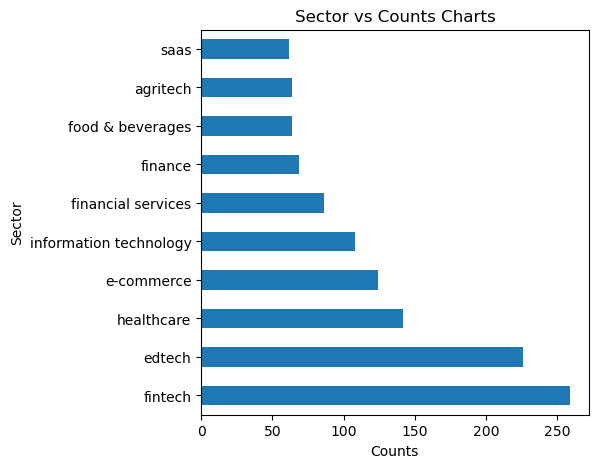

In [185]:
# Handle the missing Values
plt.title("Sector vs Counts Charts")
plt.xlabel("Counts")
plt.ylabel("Sector")
#convert names tolowercase for consistency
startup_df["Sector"]=startup_df["Sector"].str.lower()
startup_df["Sector"].value_counts().iloc[:10].plot.barh(figsize= (5,5));

plt.savefig("Sector.png")

##FinTech is the most occuring value

In [186]:
# fintech seems to be the most occuring sector thus we will replace all our empty values with fintech
startup_df['Sector'] = startup_df['Sector'].fillna("fintech")
startup_df['Sector'].unique()

array(['marketing', 'agriculture', 'finance', 'financial services',
       'e-commerce platforms', 'cloud infrastructure',
       'information technology', 'tech', 'mobile payments', 'b2b',
       'delivery', 'industrial automation', 'automotive', 'ai', 'iot',
       'air transportation', 'food & beverages', 'autonomous vehicles',
       'enterprise software', 'logistics', 'blockchain', 'education',
       'e-commerce', 'renewable energy', 'e-learning', 'clean energy',
       'transportation', 'healthcare', 'hospitality',
       'media and entertainment', 'broadcasting', 'edtech', 'fintech',
       'sports', 'food processing', 'trading platform', 'consumer goods',
       'wellness', 'fashion', 'consulting', 'biotech', 'communities',
       'retail', 'consumer applications', 'mobile', 'advertising',
       'marketplace', 'aerospace', 'home decor', 'energy',
       'digital marketing', 'creative agency', 'embedded systems',
       'beauty', 'agtech', 'credit cards', 'computer software',


In [187]:
# verify missing vallues 
startup_df["Sector"].isna().sum()

0

In [188]:
# Inspect the Stage Colimn 
startup_df['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', nan, 'Series D', 'Secondary Market',
       'Undisclosed', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round', 'Fresh funding', 'Pre series A', 'Series G',
       'Post series A', 'Seed funding', 'Seed fund', 'Series F',
       'Series B+', 'Seed round', 'Pre-seed', 'Pre-series A',
       'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B', 'Bridge',
       'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Series D1', 'Mid series', 'Series C, D',
     

In [189]:
startup_df.replace(to_replace=['Seed round','Seed funding','Early seed','Seed fund','Seed Investment','Seed Round','Seed+'], value='Seed', inplace=True)
startup_df.replace(to_replace=['Debt Financing'], value='Debt', inplace=True)
startup_df.replace(to_replace=['Venture - Series Unknown'], value='Undisclosed', inplace=True)
startup_df.replace(to_replace=['Angel Round'], value='Angel', inplace=True)
startup_df.replace(to_replace=['Pre-Series B','Pre-series B'], value='Pre series B', inplace=True)
startup_df.replace(to_replace=['Pre-seed'], value='Pre Seed', inplace=True)
startup_df.replace(to_replace=['Seis A'], value='Series A', inplace=True)

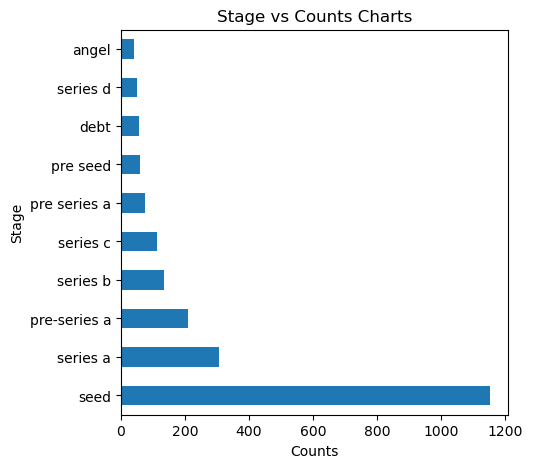

In [190]:
plt.title("Stage vs Counts Charts")
plt.xlabel("Counts")
plt.ylabel("Stage")
startup_df["Stage"]=startup_df["Stage"].str.lower()
startup_df["Stage"].value_counts().iloc[:10].plot.barh(figsize= (5,5));

In [191]:
# replace all missing values with seed since it the most occuring 
startup_df['Stage'] = startup_df['Stage'].fillna("seed")
startup_df['Stage'].unique()

array(['seed', 'series a', 'angel', 'series b', 'pre-seed',
       'private equity', 'undisclosed', 'grant', 'debt', 'post-ipo debt',
       'series h', 'series c', 'series e', 'corporate round', 'series d',
       'secondary market', 'post-ipo equity', 'non-equity assistance',
       'funding round', 'fresh funding', 'pre series a', 'series g',
       'post series a', 'series f', 'series b+', 'pre seed',
       'pre-series a', 'pre-series', 'pre-series c', 'pre series b',
       'bridge', 'series b2', 'pre- series a', 'edge', 'seed a',
       'series a-1', 'seed funding', 'pre-seed round',
       'seed round & series a', 'pre seed round', 'pre series a1',
       'series e2', 'bridge round', 'pre series c', 'series d1',
       'mid series', 'series c, d', 'series f2', 'series a+', 'series b3',
       'pe', 'series f1', 'pre-series a1', 'series a2', 'series i'],
      dtype=object)

In [192]:
startup_df['Stage'].isna().sum()

0

In [193]:
# Inspecting the Amount($) Column 
startup_df['Amount($)'].unique()

array([       250000,        584699,        950135,       2000000,
                   0,       1600000,        233879,        730873,
             1461747,        150000,       1100000,          7309,
             6000000,        650000,        511611,        935518,
              292349,       1000000,       5000000,       4000000,
              438524,       2800000,       1700000,       1300000,
               73087,        182718,        219262,        500000,
             1520217,        657786,      13400000,        365437,
              385901,        116940,           877,       9000000,
              100000,         20000,        120000,        496994,
             4999174,        143145,       8770481,     742000000,
            14617468,      29234936,       3980000,         10000,
                1462,       3654367,    1000000000,       7000000,
            35000000,       8039607,      28500000,       3508192,
             1754096,       2400000,      30000000,      36543

In [194]:
startup_df["Amount($)"].mean()

948512359.4238179

In [195]:
#replace 0 cells withthe mean value 
startup_df["Amount($)"]=startup_df["Amount($)"].replace(0,startup_df["Amount($)"].mean())

In [196]:
startup_df["HeadQuarter"].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', nan,
       'Telangana', 'Gurugram', 'Waterloo', 'Surat', 'Rajasthan',
       'Tirunelveli, Tamilnadu', 'Singapore', 'Gujarat', 'Kerala',
       'Jaipur, Rajastan', 'Frisco, Texas, United States', 'California',
       'Dhingsara, Haryana', 'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, C

Issues identified in the HeadQuarter column
- Faridabad, Haryana
- Bangalore
- Bangalore City
- new delhi to Delhi
- Banglore

In [197]:
#replace names with right names 
startup_df["HeadQuarter"]= startup_df["HeadQuarter"].replace("bengalore", "Bengaluru")
startup_df["HeadQuarter"]= startup_df["HeadQuarter"].replace("Faridabad, Haryana", "Faridabad")
startup_df["HeadQuarter"]= startup_df["HeadQuarter"].replace("Bangalore", "Bengaluru")
startup_df["HeadQuarter"]= startup_df["HeadQuarter"].replace("Bangalore City", "Bengaluru")
startup_df["HeadQuarter"]= startup_df["HeadQuarter"].replace("Banglore", "Bengaluru")
startup_df["HeadQuarter"]= startup_df["HeadQuarter"].replace("new delhi", "Delhi")

In [198]:
# change to lower to help analyse 
startup_df["HeadQuarter"]=startup_df["HeadQuarter"].str.lower()

In [199]:
# convert to datetime
startup_df['Year']=pd.to_datetime(startup_df.Year)

In [200]:
# Convert the datetime column to year
startup_df['Year'] = startup_df['Year'].dt.year


In [201]:
startup_df.to_csv("./Data/Cleaned Merge")

In [202]:
ind_startup_df = startup_df

In [203]:
ind_startup_df['Year'].unique()

array([2018, 2019, 2020, 2021], dtype=int64)

In [204]:
startup_df['Year'].unique()

array([2018, 2019, 2020, 2021], dtype=int64)

HYPOTHESIS TESTING WITH ANOVA

In [238]:
#Drop null values in the dataframe
ind_startup_df = ind_startup_df.dropna()

In [239]:
from scipy.stats import f_oneway

# obtain the unique values in the 'headquarter' column
headquarters = ind_startup_df['HeadQuarter'].unique()

# Make a list to store the data for each group
data = []

# Iterate over the unique values and obtain the data for each group
for hq in headquarters:
    data.append(ind_startup_df.loc[ind_startup_df['HeadQuarter'] == hq, 'Amount($)'])

# Execute the ANOVA test
f_statistic, p_value = f_oneway(*data)

# print the results
print('F-statistic:', f_statistic)
print('p-value:', p_value)
if p_value < 0.05:
    print('There is a significant difference between the groups.')
else:
    print('There is no significant difference between the groups.')

F-statistic: 0.05431061160758376
p-value: 0.9999999999999999
There is no significant difference between the groups.


In [241]:
startup_df['Year'].unique()

array([2018, 2019, 2020, 2021], dtype=int64)

In [242]:
ind_startup_df['Year'].unique()

array([2019, 2020, 2021], dtype=int64)

# Answering the questions as put to the data

Q1: What is the total amount invested per year over the 4 years period?

In [207]:
startup_df['Year'].unique()

array([2018, 2019, 2020, 2021], dtype=int64)

In [208]:
total_amount_invested_per_year = startup_df.groupby('Year')['Amount($)'].sum().apply(lambda x: '${:,.2f}'.format(x))
df_total_amount_invested_per_year = pd.DataFrame({'Year': total_amount_invested_per_year.index, 'Amount($)': total_amount_invested_per_year.values})

df_total_amount_invested_per_year

Year              Amount($)
0  2018    $147,022,837,239.73
1  2019     $14,717,581,513.09
2  2020  $1,136,286,437,687.68
3  2021  $1,929,760,702,678.76

Visualization

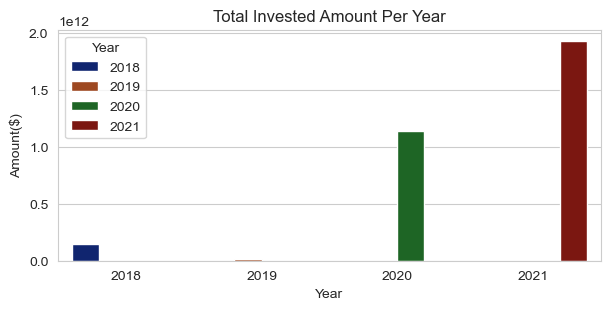

In [209]:
df_total_amount_invested_per_year['Amount($)'] = df_total_amount_invested_per_year['Amount($)'].apply(lambda x: float(x.replace(',', '').replace('$', '')))
sns.set_style(style='whitegrid')
plt.figure(figsize=(7, 3))
plt.title('Total Invested Amount Per Year')
sns.barplot(x='Year', y='Amount($)', palette='dark', data=df_total_amount_invested_per_year, hue='Year')
plt.show()

Q2: Which Stage/ Series has the most investment?

In [210]:
most_inv_stage = startup_df.groupby(['Stage'])['Amount($)'].sum().sort_values(ascending=False).apply(lambda x: '${:,.2f}'.format(x)).head(5)
df_most_inv_stage = pd.DataFrame({'Stage': most_inv_stage.index, 'Amount($)': most_inv_stage.values})
df_most_inv_stage


Stage              Amount($)
0          debt  $1,506,011,698,659.00
1          seed  $1,373,589,791,931.34
2      series c     $46,676,812,829.85
3      series a     $39,305,774,276.36
4  pre-series a     $37,334,812,579.83

Visualization

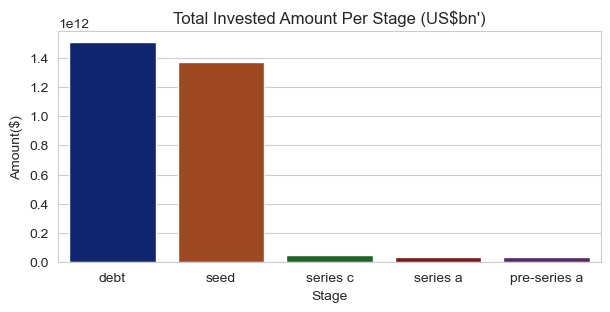

In [211]:
df_most_inv_stage['Amount($)'] = df_most_inv_stage['Amount($)'].apply(lambda x: float(x.replace(',', '').replace('$', '')))
sns.set_style(style='whitegrid')
plt.figure(figsize=(7, 3))
plt.title("Total Invested Amount Per Stage (US$bn')")
sns.barplot(x='Stage', y='Amount($)', palette='dark', data=df_most_inv_stage)
plt.show()

Q3: Has the amounts of investments increased or decreased over the period

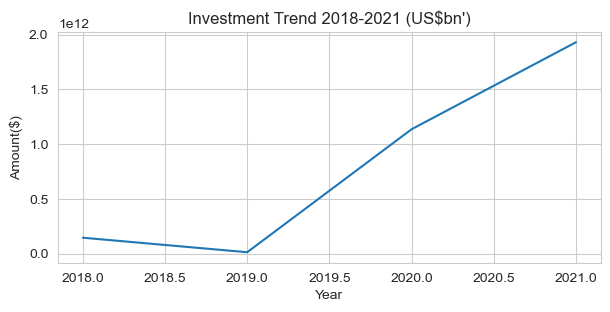

In [212]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(7, 3))
plt.title("Investment Trend 2018-2021 (US$bn')")
sns.lineplot(x='Year', y='Amount($)', palette='dark', data=df_total_amount_invested_per_year)
plt.show()

Q4: What are the top five (5) industries or sectors with more investment?

In [213]:
industry_inv = startup_df.groupby(['Sector'])['Amount($)'].sum().sort_values(ascending=False).apply(lambda x: '${:,.2f}'.format(x)).head(5)
df_industry_inv = pd.DataFrame({'Sector': industry_inv.index, 'Amount($)': industry_inv.values})
df_industry_inv

Sector              Amount($)
0     fintech  $1,592,568,367,458.92
1      retail    $707,942,017,078.27
2      edtech     $88,019,951,269.22
3  healthcare     $52,281,368,271.65
4  e-commerce     $43,470,426,689.20

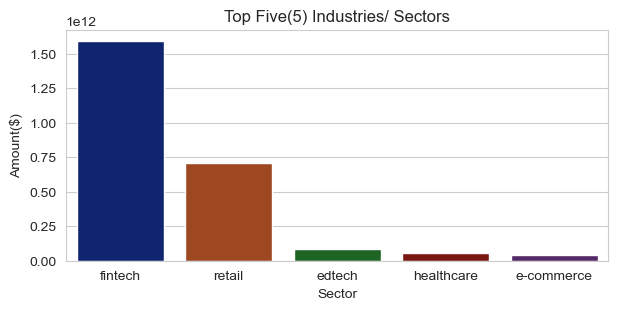

In [214]:
df_industry_inv['Amount($)'] = df_industry_inv['Amount($)'].apply(lambda x: float(x.replace(',', '').replace('$', '')))
sns.set_style(style='whitegrid')
plt.figure(figsize=(7, 3))
plt.title("Top Five(5) Industries/ Sectors")
sns.barplot(x='Sector', y='Amount($)', palette='dark', data=df_industry_inv)
plt.show()

Q5: What is the highest type of investment that was made?

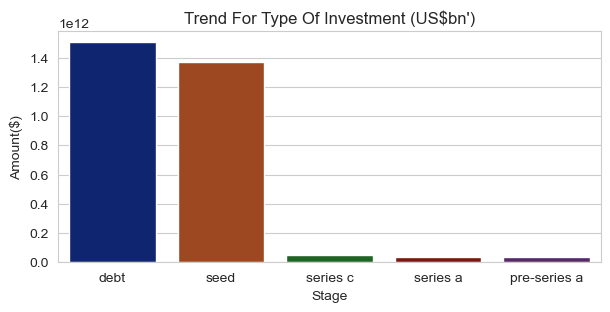

In [243]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(7, 3))
plt.title("Trend For Type Of Investment (US$bn')")
sns.barplot(x='Stage', y='Amount($)', palette='dark', data=df_most_inv_stage)
plt.show()

Q6: Does the stage of a venture affect the amount of funding received?
This question seeks find

In [245]:
mean_stage = startup_df.groupby(['Stage'])['Amount($)'].mean().sort_values(ascending=False).apply(lambda x: '${:,.2f}'.format(x)).head(5)
df_mean_stage = pd.DataFrame({'Stage': mean_stage.index, 'Amount($)': mean_stage.values})
df_mean_stage

Stage           Amount($)
0      debt  $25,965,718,942.40
1  series h   $3,531,250,000.00
2  series f   $1,532,000,000.00
3  series g   $1,151,666,666.67
4  series e   $1,139,640,047.77

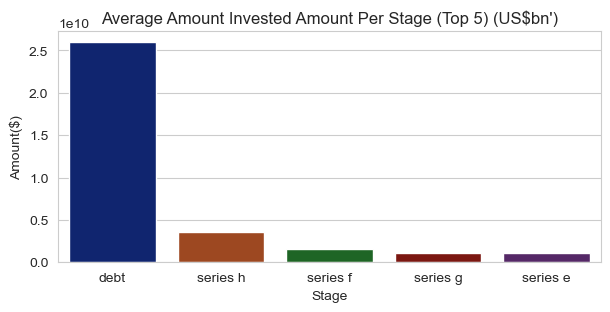

In [246]:
df_mean_stage['Amount($)'] = df_mean_stage['Amount($)'].apply(lambda x: float(x.replace(',', '').replace('$', '')))
sns.set_style(style='whitegrid')
plt.figure(figsize=(7, 3))
plt.title("Average Amount Invested Amount Per Stage (Top 5) (US$bn')")
sns.barplot(x='Stage', y='Amount($)', palette='dark', data=df_mean_stage)
plt.show()

Q7: Which Top 5 startups are investors favorite?

In [237]:
fav_startups = startup_df.groupby(['Company/Brand'])['Amount($)'].sum().apply(lambda x: '${:,.2f}'.format(x)).head(5)
df_fav_startups = pd.DataFrame({'Company/Brand': fav_startups})
df_fav_startups

Company/Brand
Company/Brand                    
&ME               $948,512,359.42
1Bridge            $25,000,000.00
1Crowd              $3,500,000.00
1K Kirana Bazaar   $70,000,000.00
1MG                $99,000,000.00